In [46]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from chart_studio import plotly
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline

# Load the dataset
investdata = pd.read_csv('FDI data.csv')

# Checking for null values and filling with 0
investdata.fillna(0, inplace=True)

# Display the first few rows
print(investdata.head())


                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [10]:
years = ['2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016']
investdata.columns= ['Sector']+years

In [11]:
annual_fdi = investdata[years].sum(axis=0)

In [12]:
annual_fdi[-17:]

2000     2378.71
2001     4027.69
2002     2704.32
2003     2187.85
2004     3218.69
2005     5539.75
2006    12491.76
2007    24575.40
2008    31395.96
2009    25834.38
2010    21383.07
2011    35120.78
2012    22423.59
2013    24299.32
2014    30930.47
2015    40000.99
2016    43478.26
dtype: float64

In [13]:
trace = go.Scatter(
    x= annual_fdi.index[-17:],
    y=annual_fdi.values[-17:],
    mode = 'lines',
    name = 'FDI'
)

layout = go.Layout(
    title='FDI by year',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Total FDI',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
#df['Sector'].unique()
investdata[investdata['Sector']=='METALLURGICAL INDUSTRIES'][years].values[0][-17:]

array([  22.69,   14.14,   36.61,    8.11,  200.38,  149.13,  169.94,
       1175.75,  959.94,  419.88, 1098.14, 1786.14, 1466.23,  567.63,
        359.34,  456.31, 1440.18])

In [15]:
#df['Sector'].unique()
investdata[investdata['Sector']=='METALLURGICAL INDUSTRIES'][years].values[0][-17:]

In [16]:
def f(x, y, n):
    if x:return ((y/x)**(1/n))-1
    else: return np.nan
y_start = 2012
y_end = 2016
investdata['cagr'] = investdata[['Sector',str(y_start),str(y_end)]].apply(lambda x: f(x[str(y_start)],x[str(y_end)], y_end-y_start), axis=1)

In [17]:
investdata[['Sector','cagr']].sort_values(by='cagr',ascending=False)

Sector      cagr
45                 CEMENT AND GYPSUM PRODUCTS  2.621761
34  PAPER AND PULP (INCLUDING PAPER PRODUCTS)  1.496162
54                             RETAIL TRADING  1.120337
11                         TELECOMMUNICATIONS  1.068563
8                       ELECTRICAL EQUIPMENTS  0.837037
..                                        ...       ...
4                             COAL PRODUCTION       NaN
16                                      PORTS       NaN
30            PHOTOGRAPHIC RAW FILM AND PAPER       NaN
31                                 DYE-STUFFS       NaN
42                           GLUE AND GELATIN       NaN

[63 rows x 2 columns]

In [18]:
t = investdata[['Sector','2000']]['2000'].sum()

trace = go.Pie(labels=investdata['Sector'].values, values=((investdata['2000']/t)*100).values)
layout = go.Layout(showlegend=False)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [19]:
t = investdata[['Sector','2001']]['2001'].sum()

trace = go.Pie(labels=investdata['Sector'].values, values=((investdata['2001']/t)*100).values)
layout = go.Layout(showlegend=False)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [20]:
t = investdata[['Sector','2003']]['2003'].sum()

trace = go.Pie(labels=investdata['Sector'].values, values=((investdata['2003']/t)*100).values)
layout = go.Layout(showlegend=False)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [21]:
investdata[['Sector','2000']].sort_values(by='2000',ascending=False)['Sector'][:17].values

array(['MISCELLANEOUS INDUSTRIES', 'COMPUTER SOFTWARE & HARDWARE',
       'AUTOMOBILE INDUSTRY', 'TELECOMMUNICATIONS',
       'CHEMICALS (OTHER THAN FERTILIZERS)', 'POWER',
       'INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)',
       'ELECTRICAL EQUIPMENTS',
       'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)',
       'CEMENT AND GYPSUM PRODUCTS',
       'PAPER AND PULP (INCLUDING PAPER PRODUCTS)',
       'FOOD PROCESSING INDUSTRIES',
       'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES',
       'DRUGS & PHARMACEUTICALS', 'GLASS',
       'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects',
       'METALLURGICAL INDUSTRIES'], dtype=object)

In [60]:
investdata[['Sector','2001']].sort_values(by='2001',ascending=False)['Sector'][:17].values

array(['TELECOMMUNICATIONS', 'POWER', 'COMPUTER SOFTWARE & HARDWARE',
       'AUTOMOBILE INDUSTRY', 'MISCELLANEOUS INDUSTRIES',
       'FOOD PROCESSING INDUSTRIES', 'PETROLEUM & NATURAL GAS',
       'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)',
       'CEMENT AND GYPSUM PRODUCTS', 'CHEMICALS (OTHER THAN FERTILIZERS)',
       'DRUGS & PHARMACEUTICALS', 'CONSULTANCY SERVICES',
       'ELECTRICAL EQUIPMENTS',
       'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES',
       'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects',
       'RUBBER GOODS', 'TRADING'], dtype=object)

In [61]:
investdata[['Sector','2003']].sort_values(by='2003',ascending=False)['Sector'][:17].values

array(['COMPUTER SOFTWARE & HARDWARE',
       'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)',
       'MISCELLANEOUS INDUSTRIES', 'AUTOMOBILE INDUSTRY', 'PORTS',
       'FOOD PROCESSING INDUSTRIES', 'DRUGS & PHARMACEUTICALS',
       'TELECOMMUNICATIONS', 'ELECTRONICS', 'PETROLEUM & NATURAL GAS',
       'ELECTRICAL EQUIPMENTS', 'MACHINE TOOLS', 'HOTEL & TOURISM',
       'AGRICULTURAL MACHINERY',
       'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects',
       'CONSULTANCY SERVICES', 'TRADING'], dtype=object)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Extract the years and sectors
years = [col for col in investdata.columns if '20' in col]
sectors = investdata['Sector']

# Initialize a dataframe to store the predictions
predictions = pd.DataFrame()

for sector in sectors:
    # Preparing the data for each sector
    sector_data = investdata[investdata['Sector'] == sector][years].T.reset_index()
    sector_data.columns = ['Year', 'FDI']
    sector_data['Year'] = sector_data['Year'].apply(lambda x: int(x.split('-')[0]))

    # Splitting the data into training and testing sets
    X = sector_data['Year'].values.reshape(-1, 1)
    y = sector_data['FDI'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing and training the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Making predictions for the year 2017-18
    future_year = np.array([[2017]])
    future_pred = model.predict(future_year)
    
    # Store predictions in a temporary DataFrame
    temp_df = pd.DataFrame({'Sector': [sector], '2017-18': [future_pred[0]]})
    predictions = pd.concat([predictions, temp_df], ignore_index=True)

# Display the predictions
print(predictions.head())


                     Sector    2017-18
0  METALLURGICAL INDUSTRIES  1174.6078
1                    MINING   167.1017
2                     POWER  1032.4429
3   NON-CONVENTIONAL ENERGY   729.1650
4           COAL PRODUCTION     0.2072


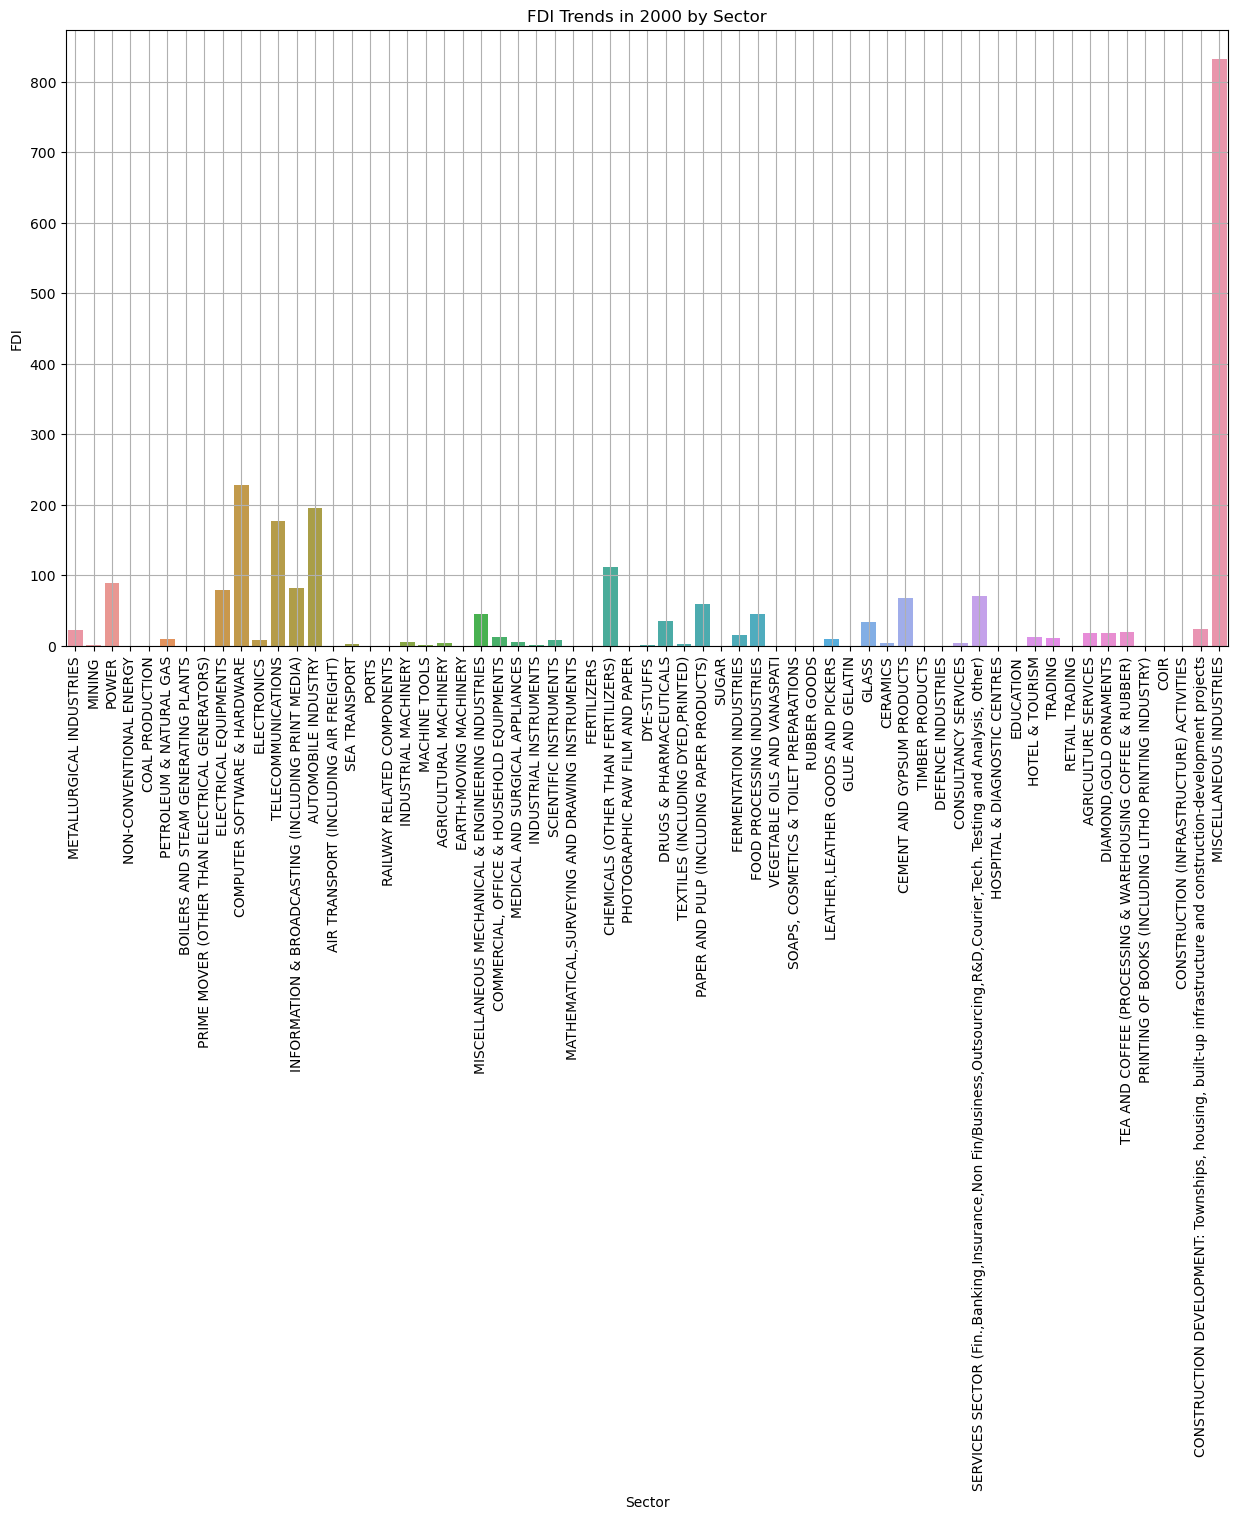

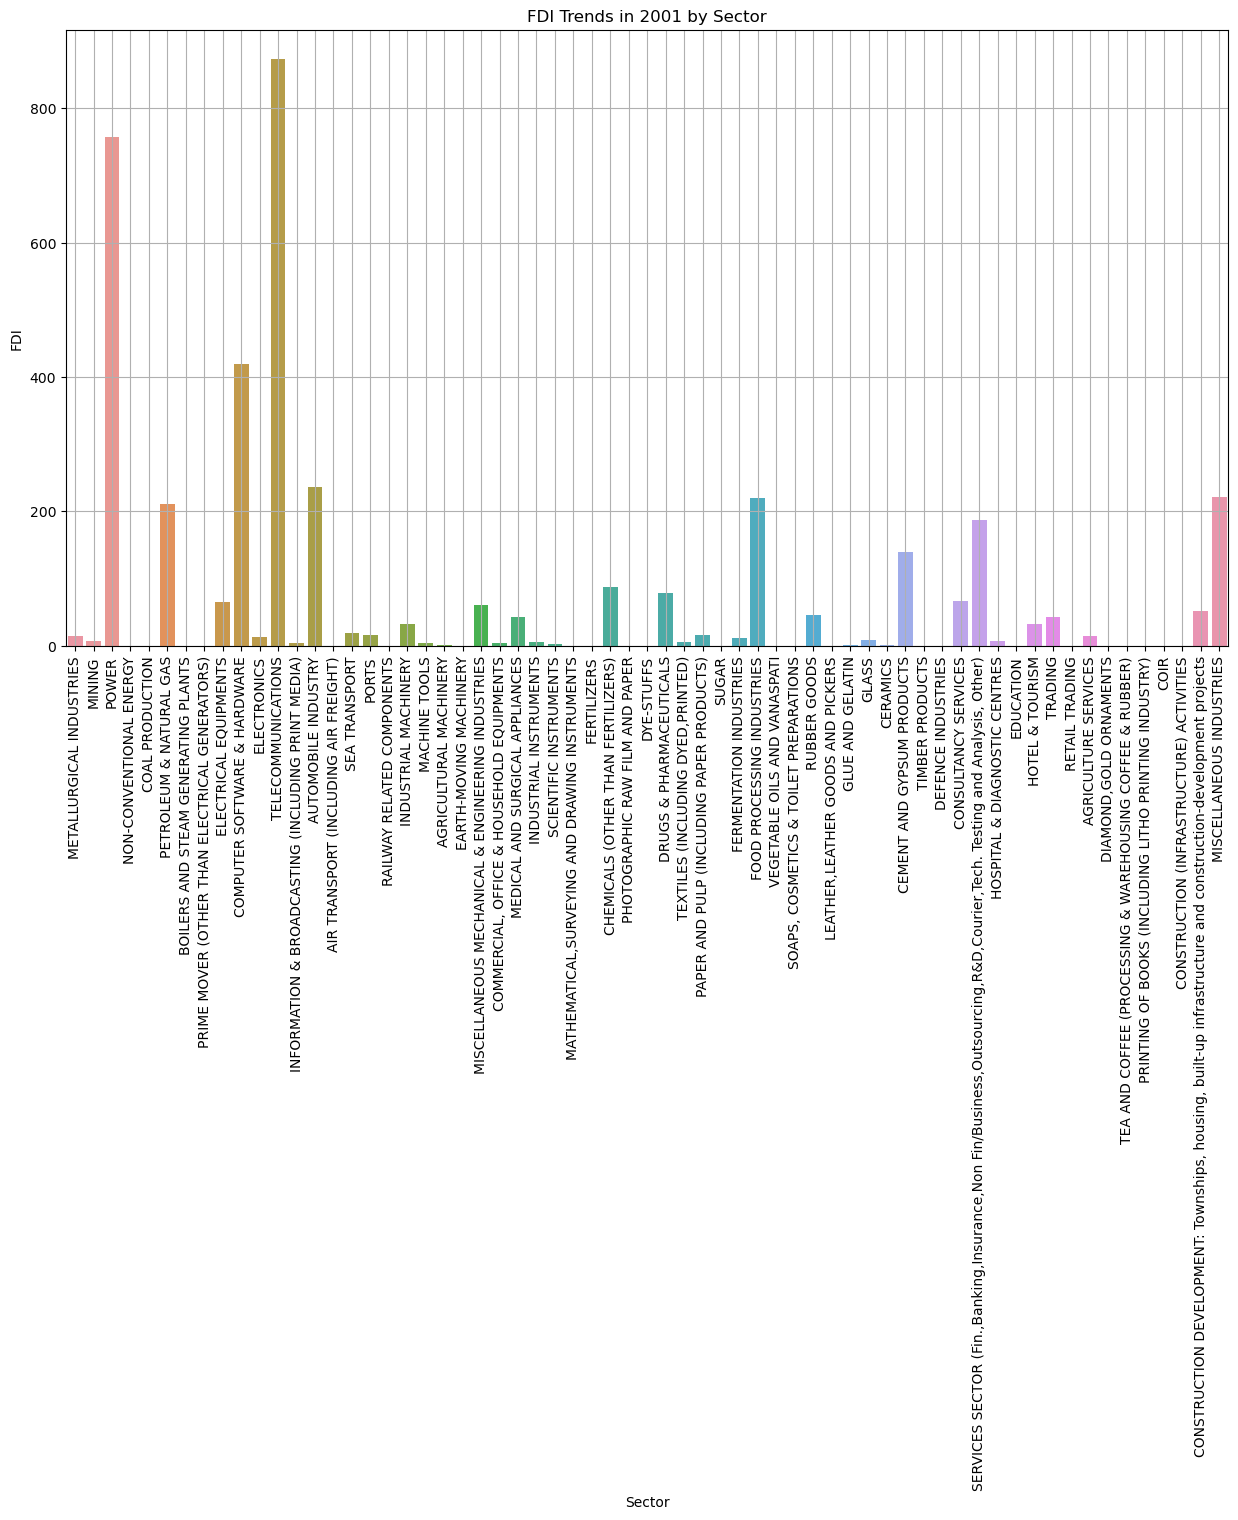

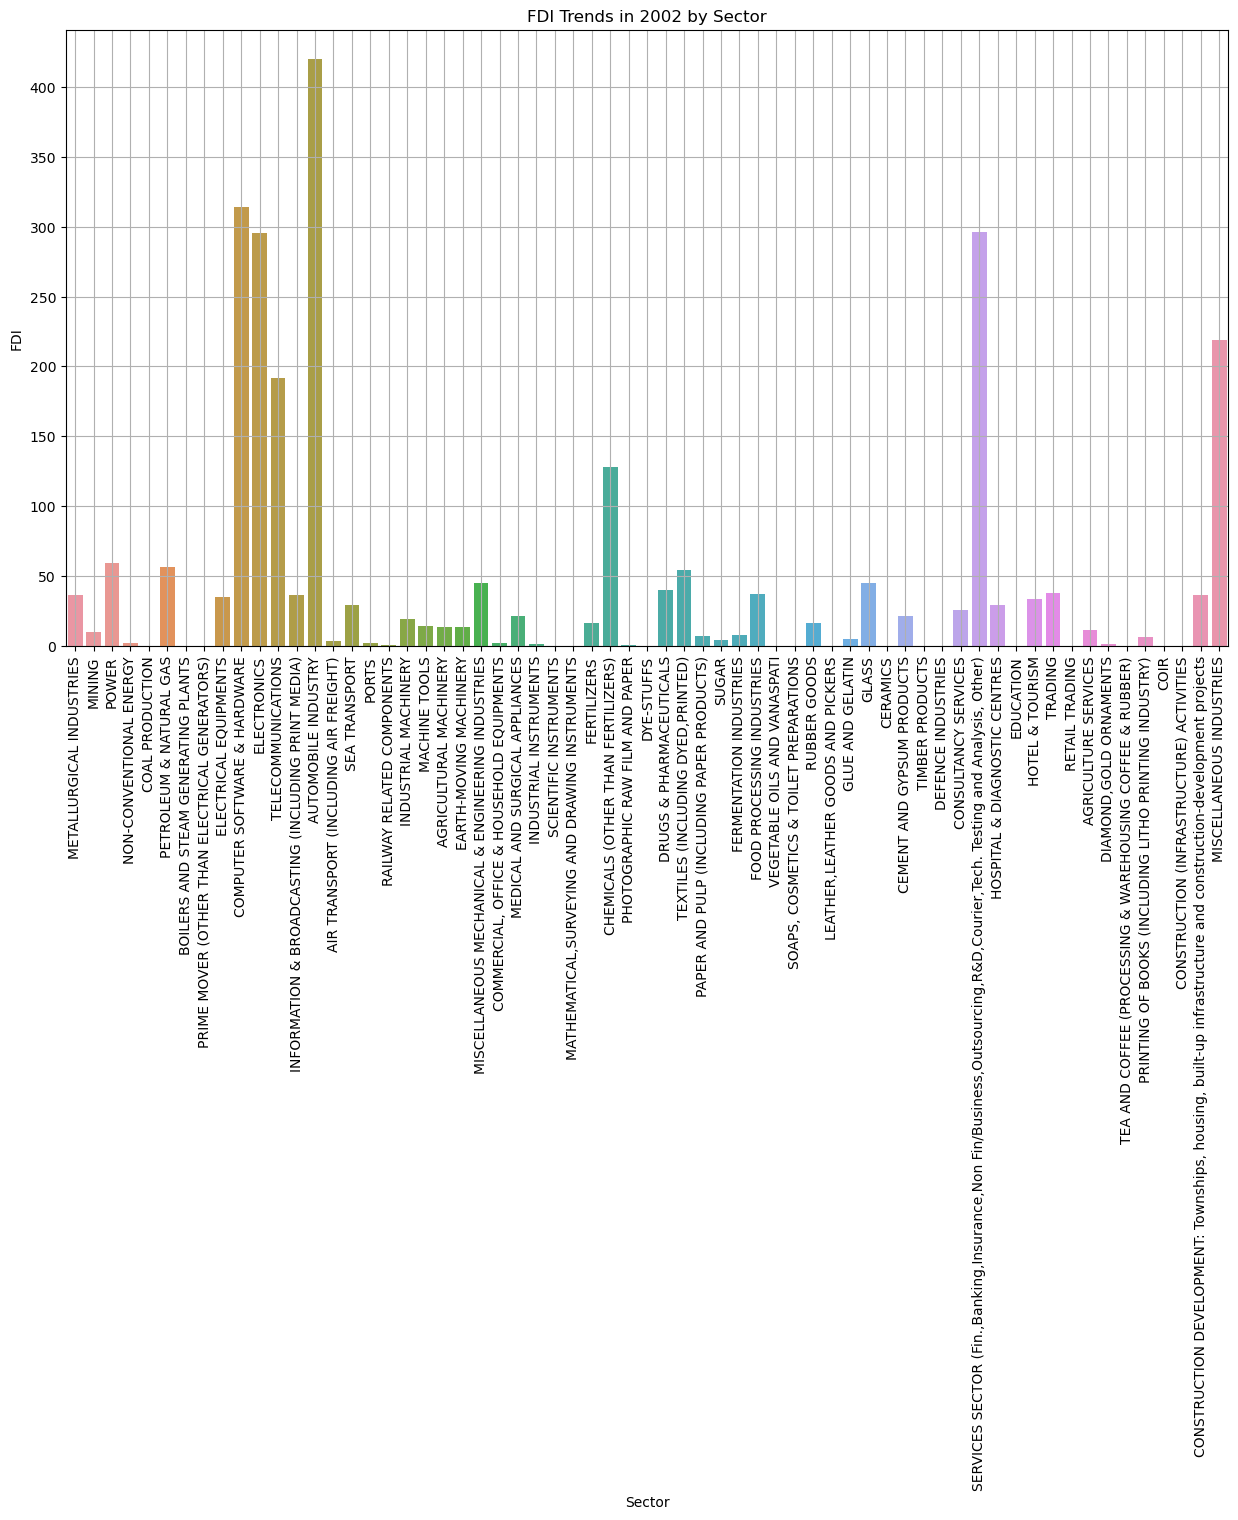

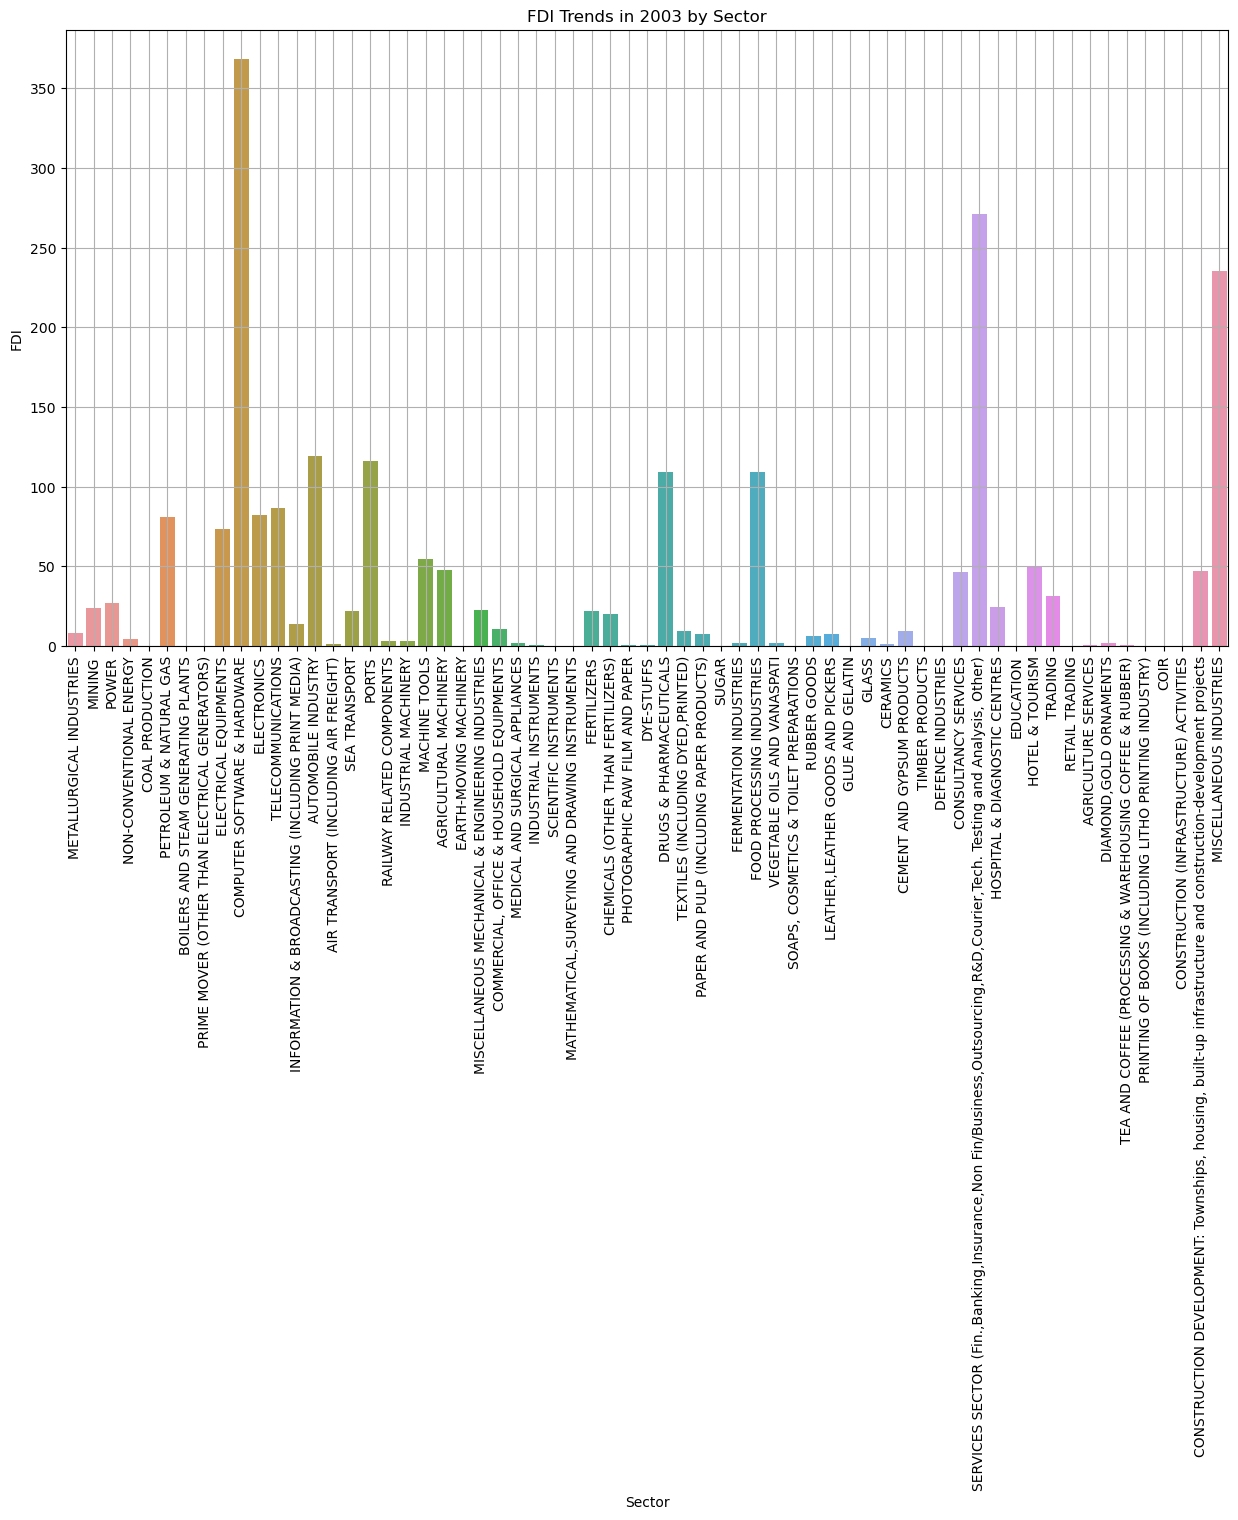

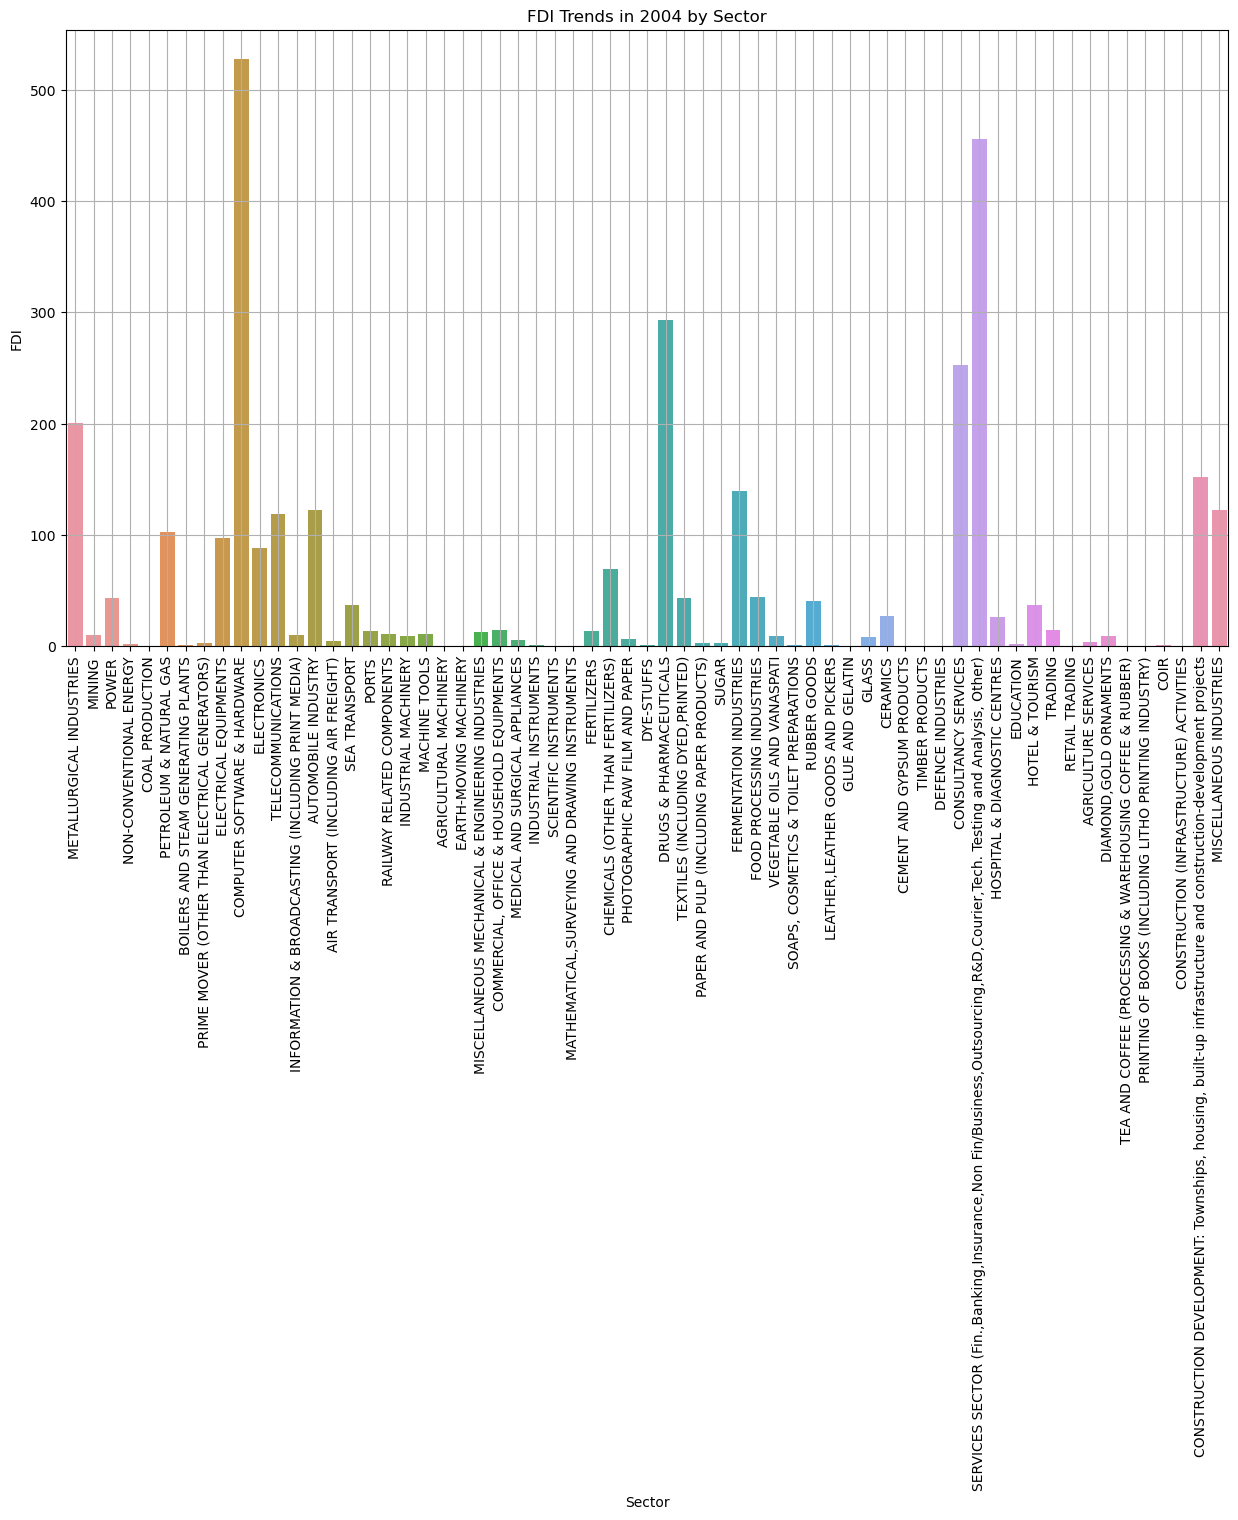

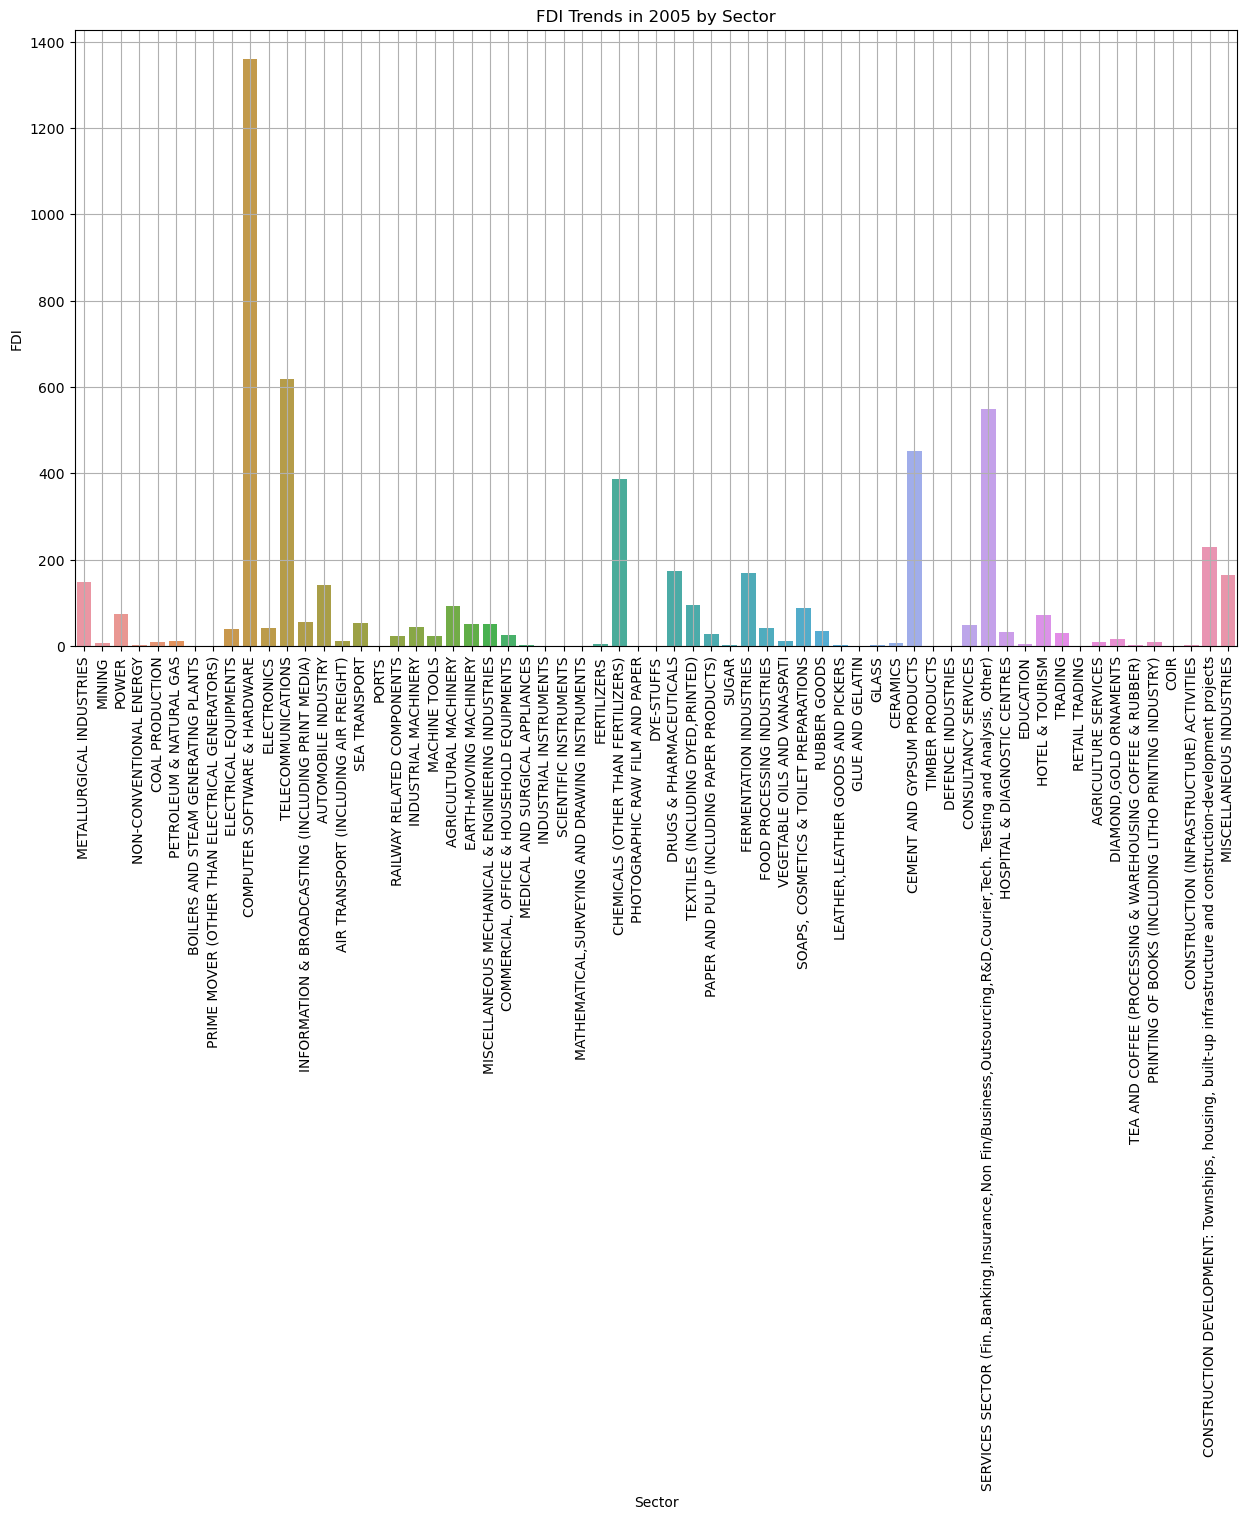

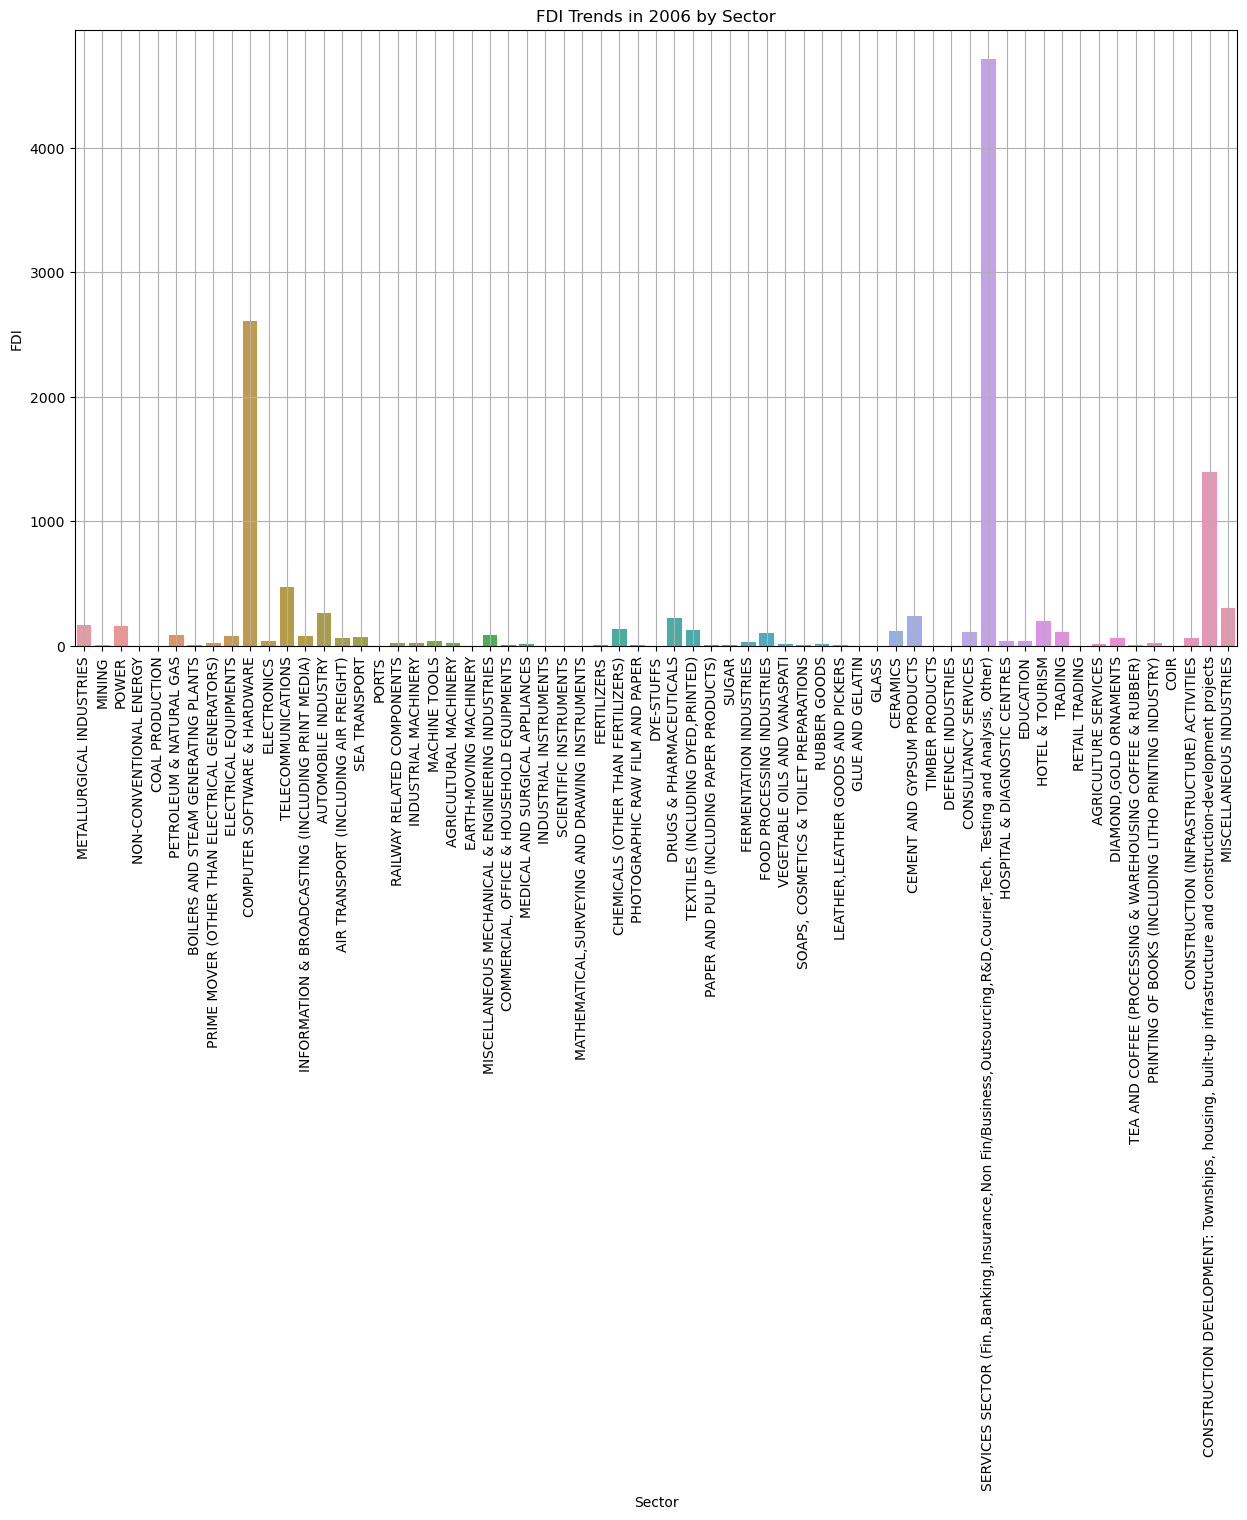

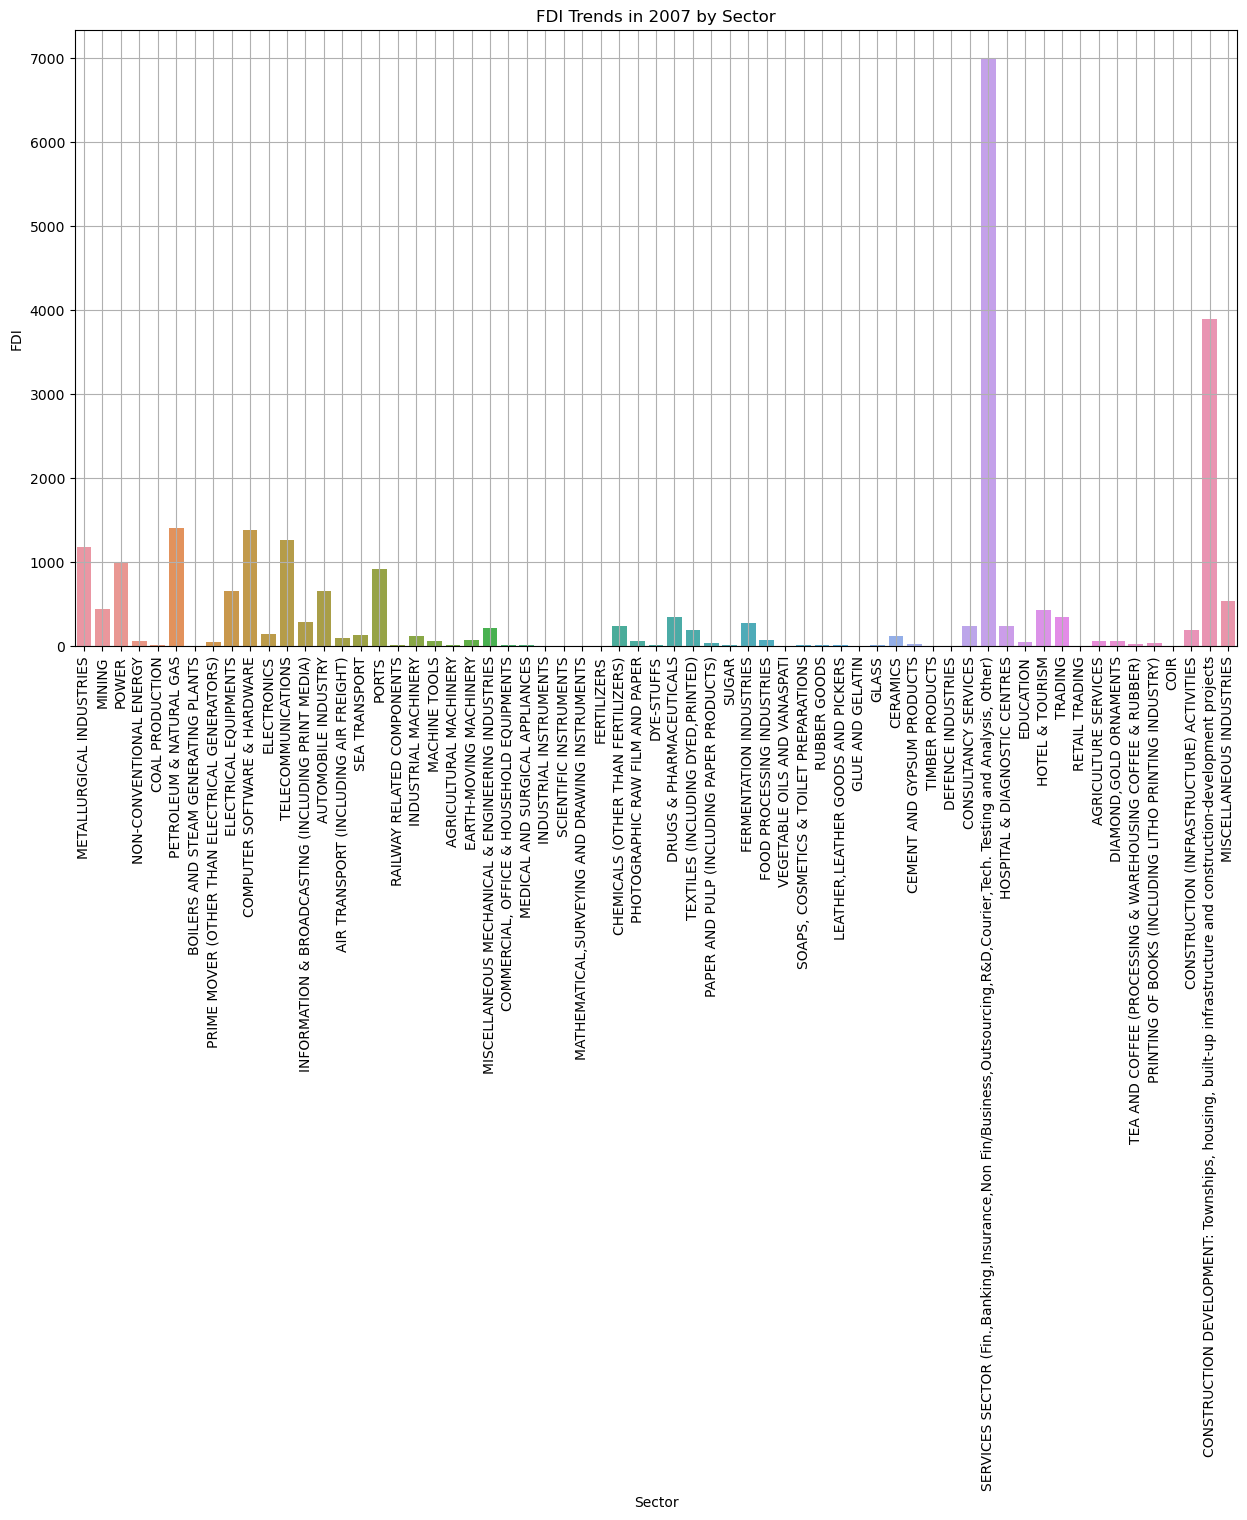

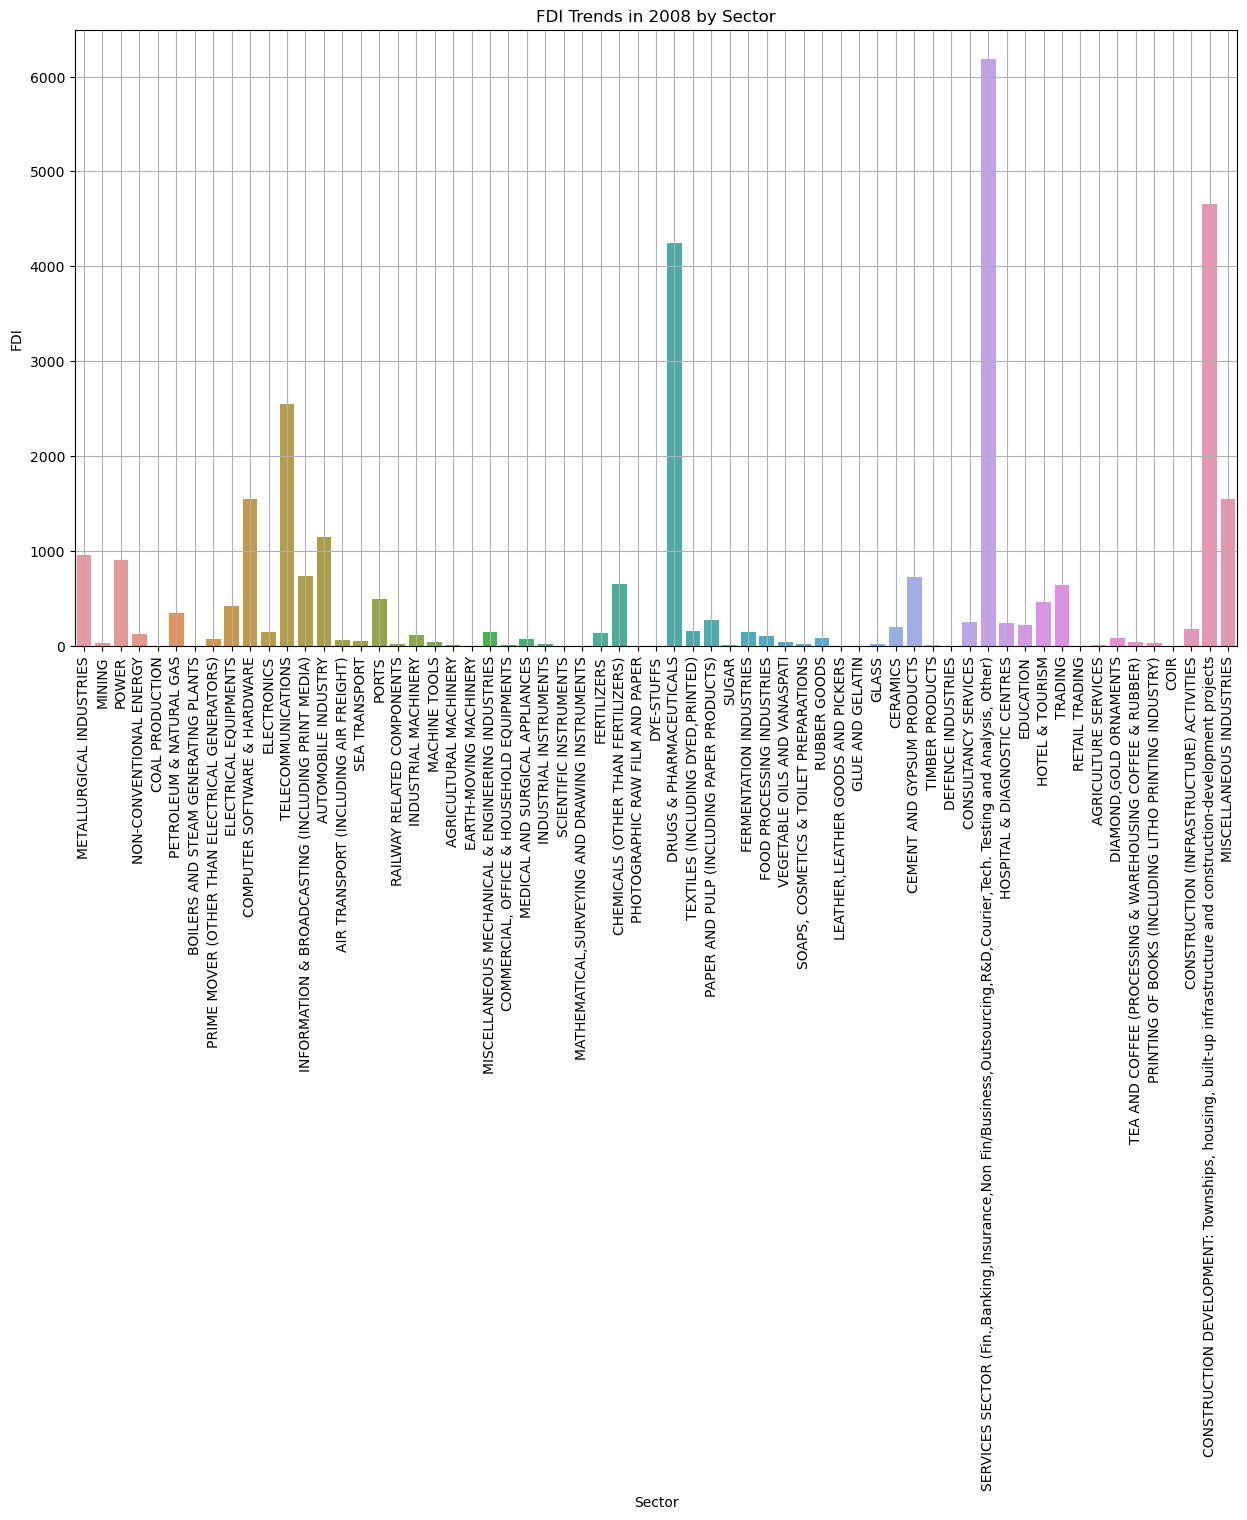

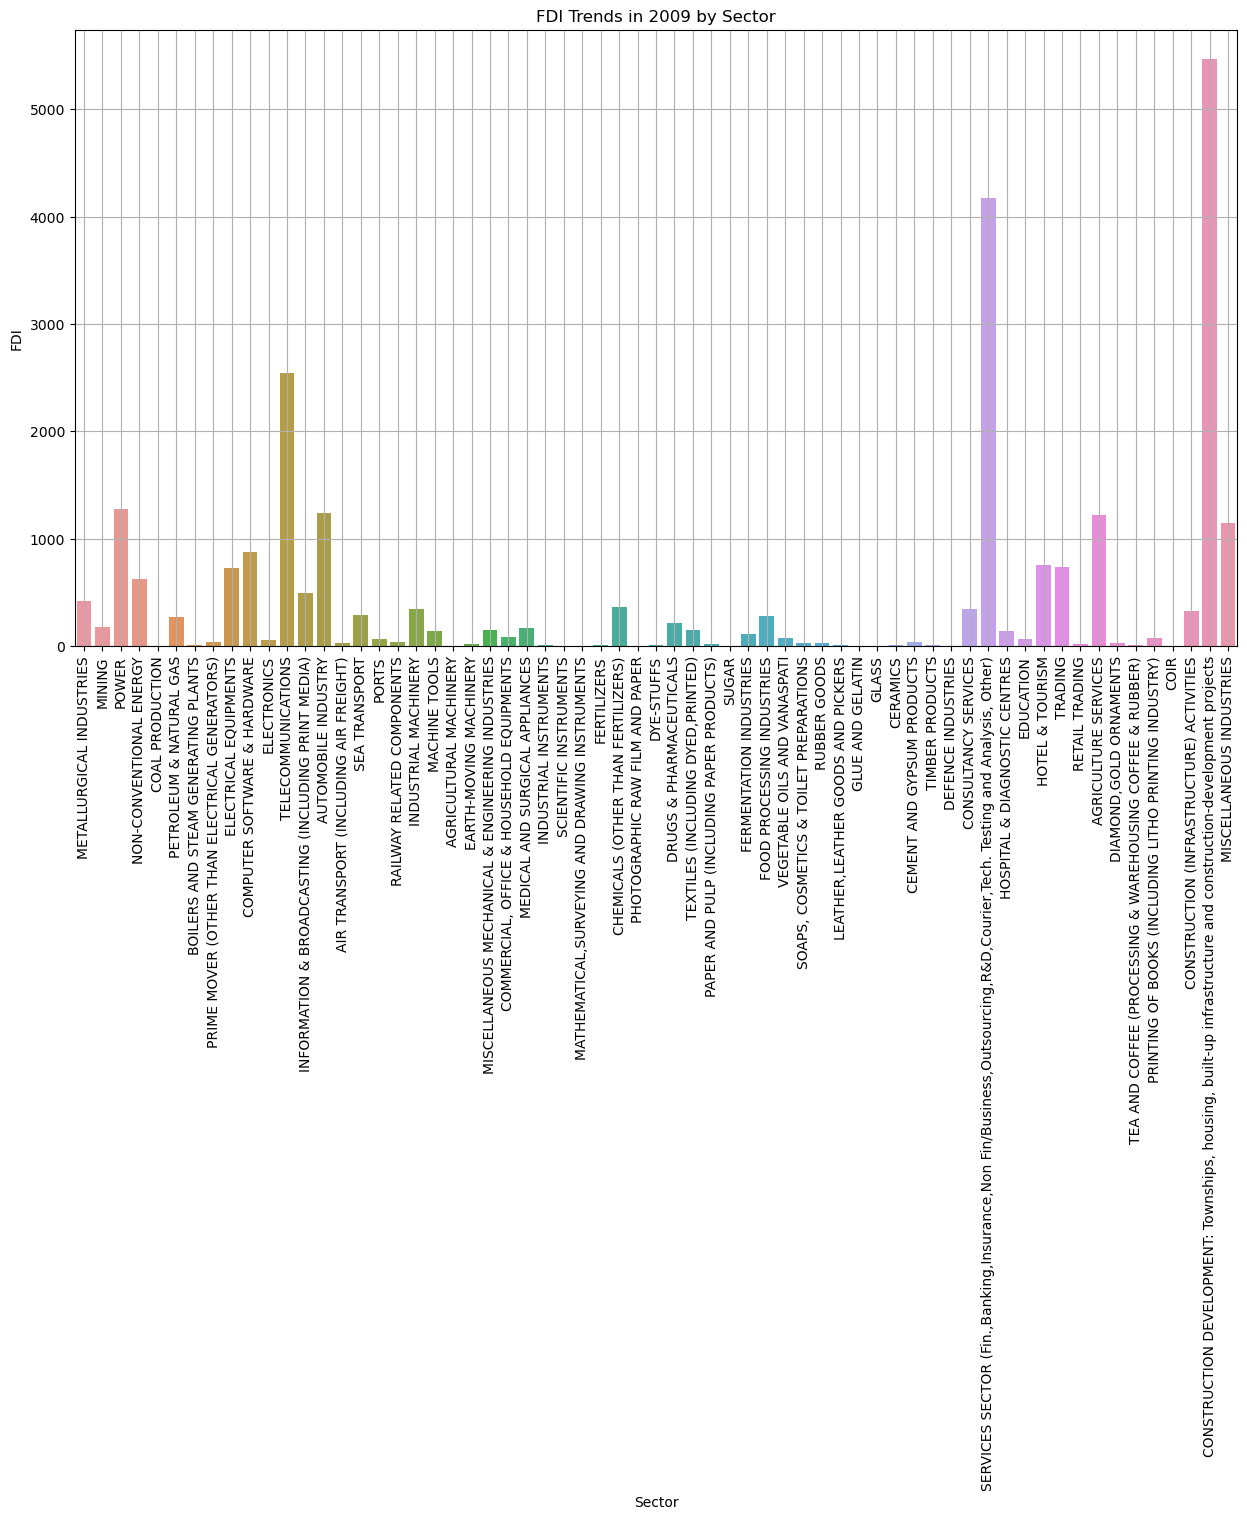

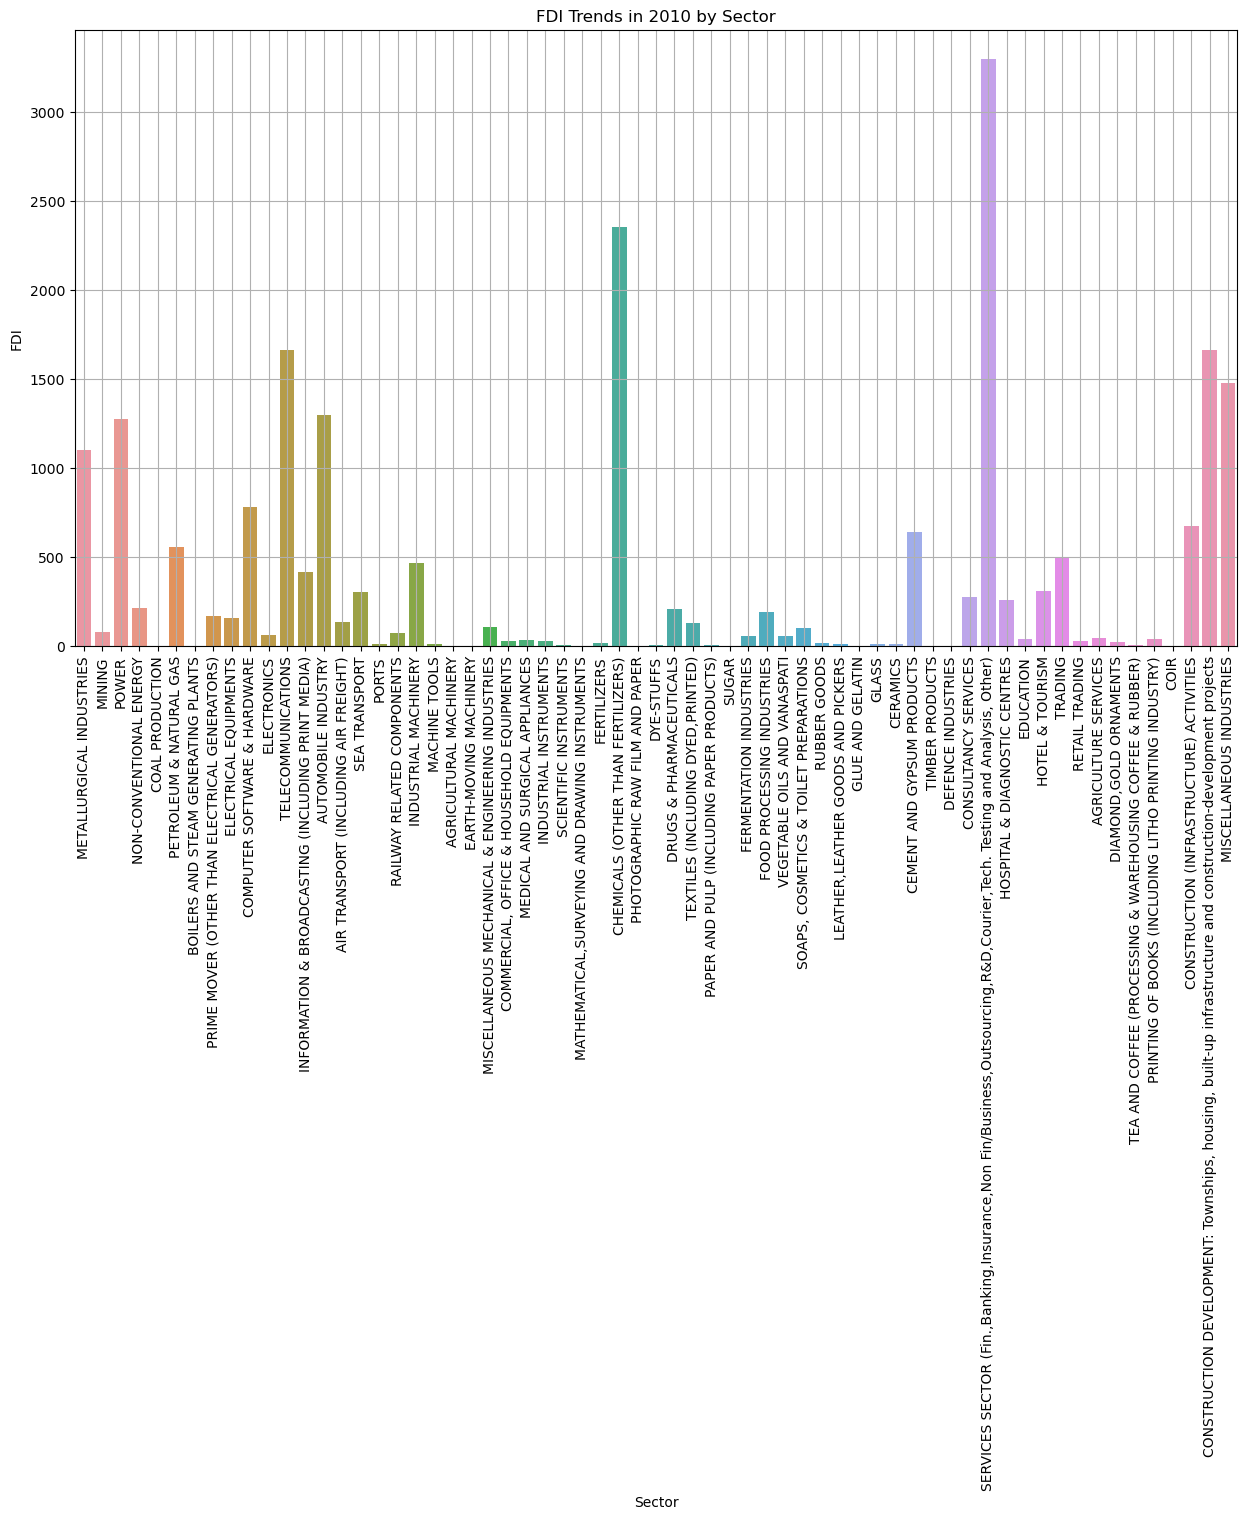

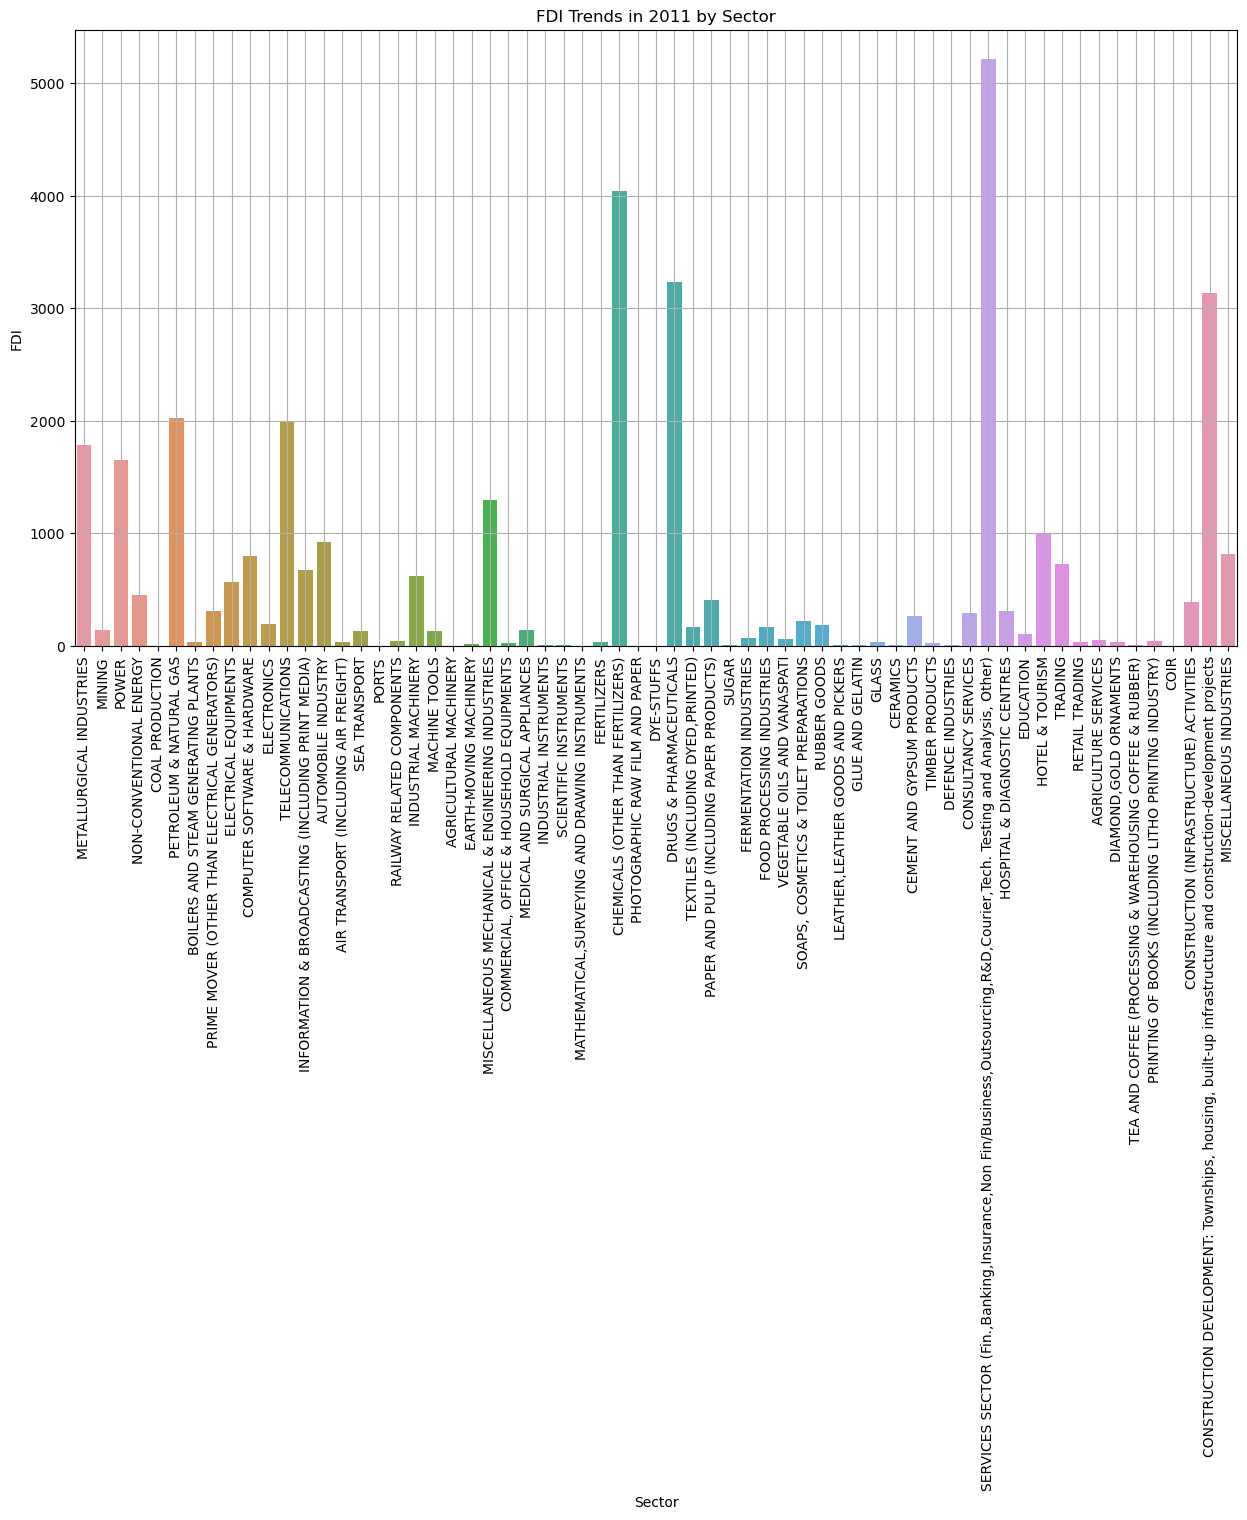

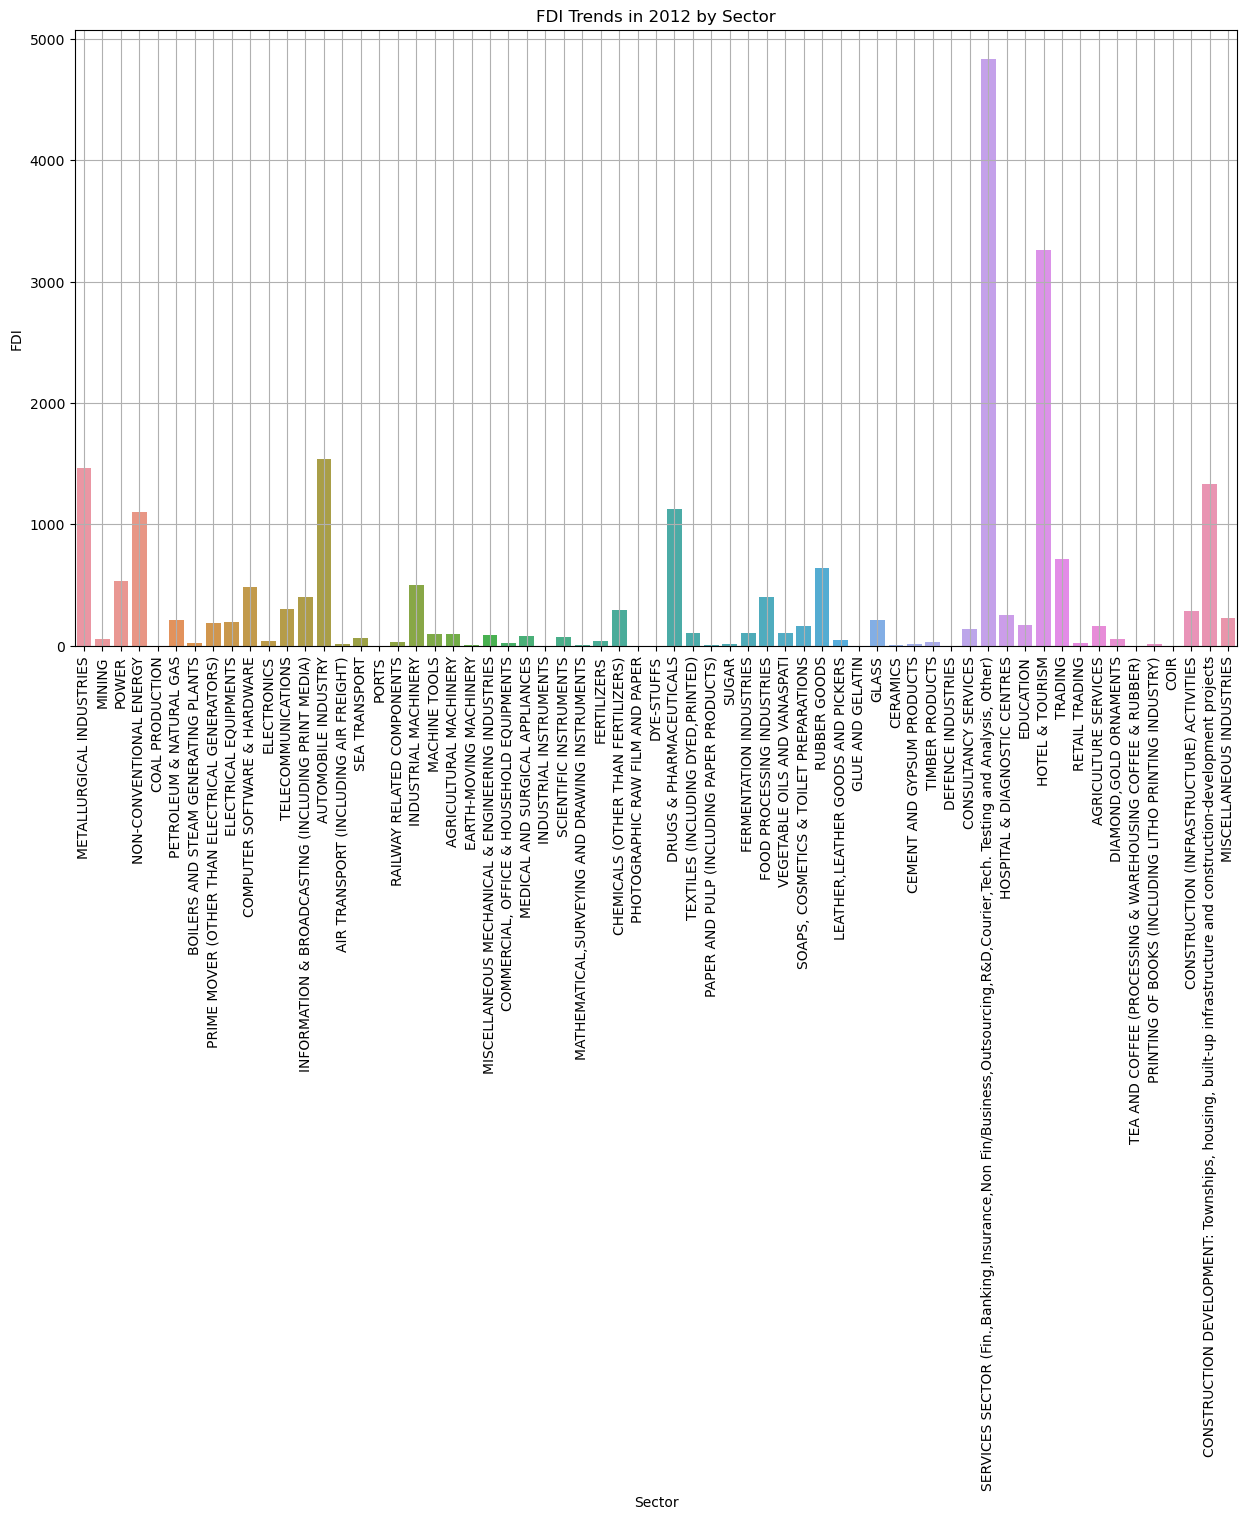

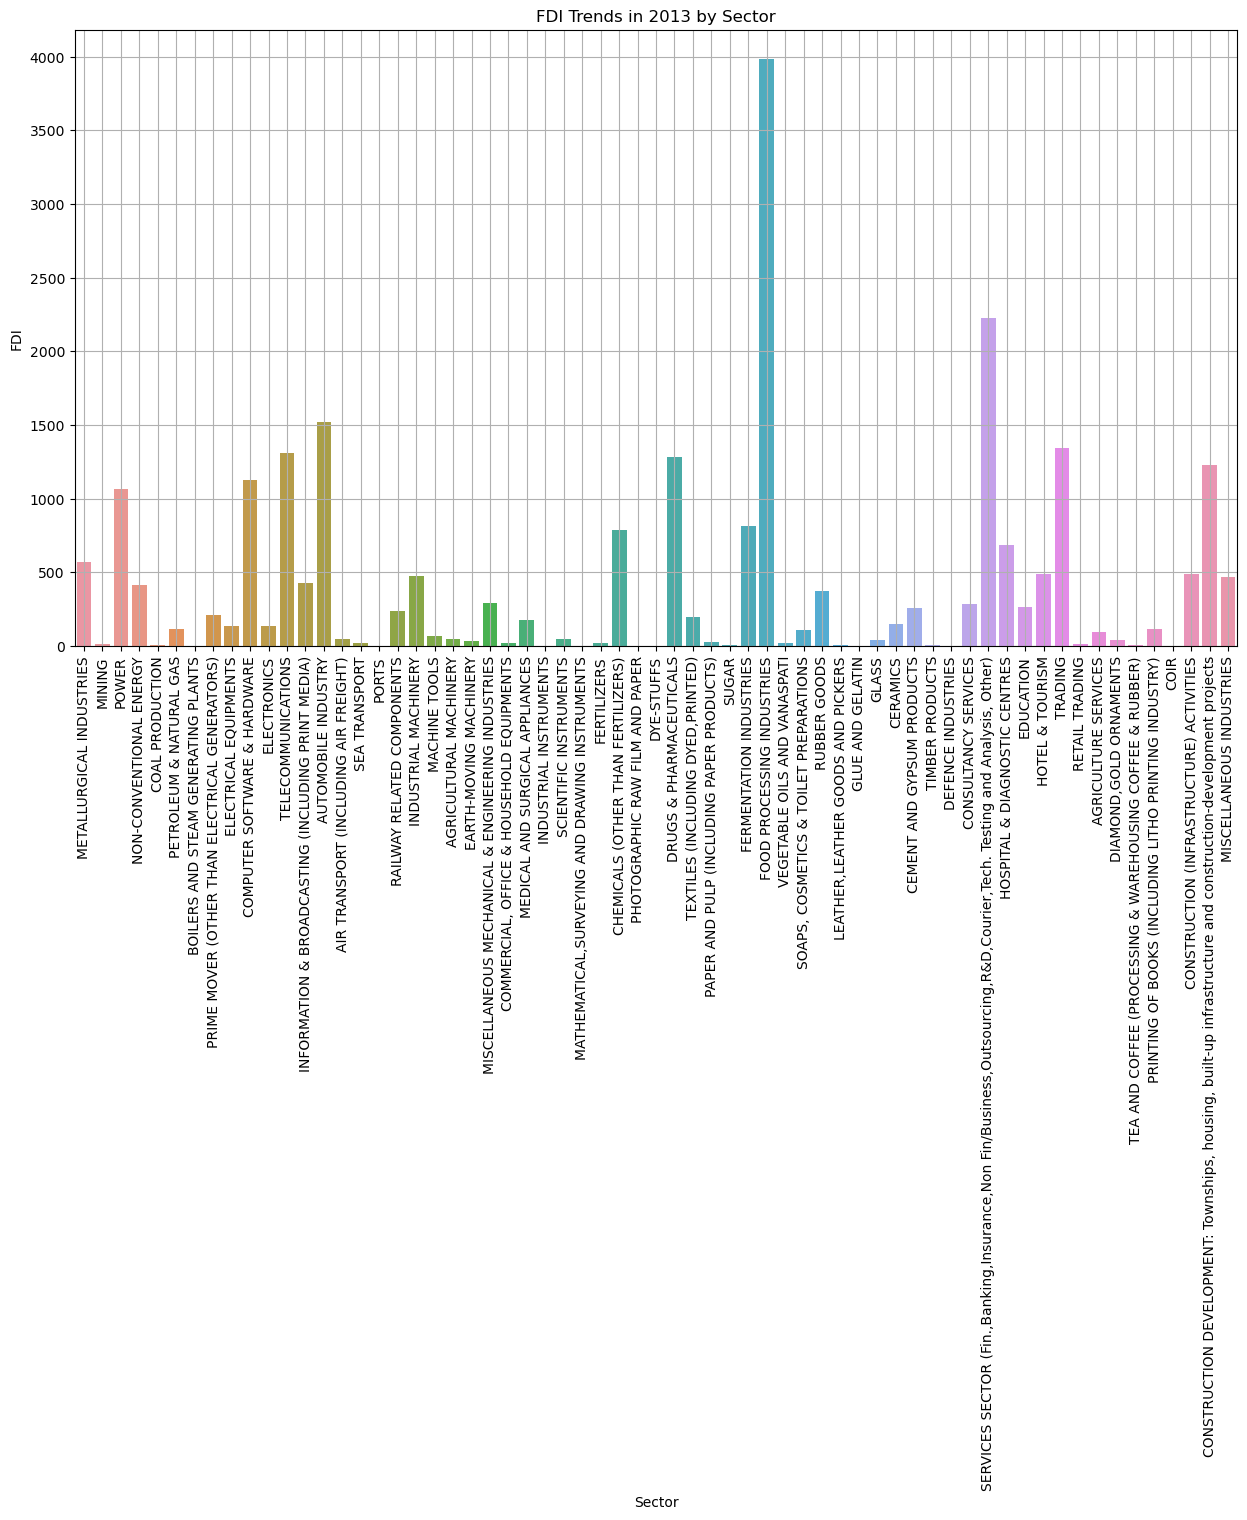

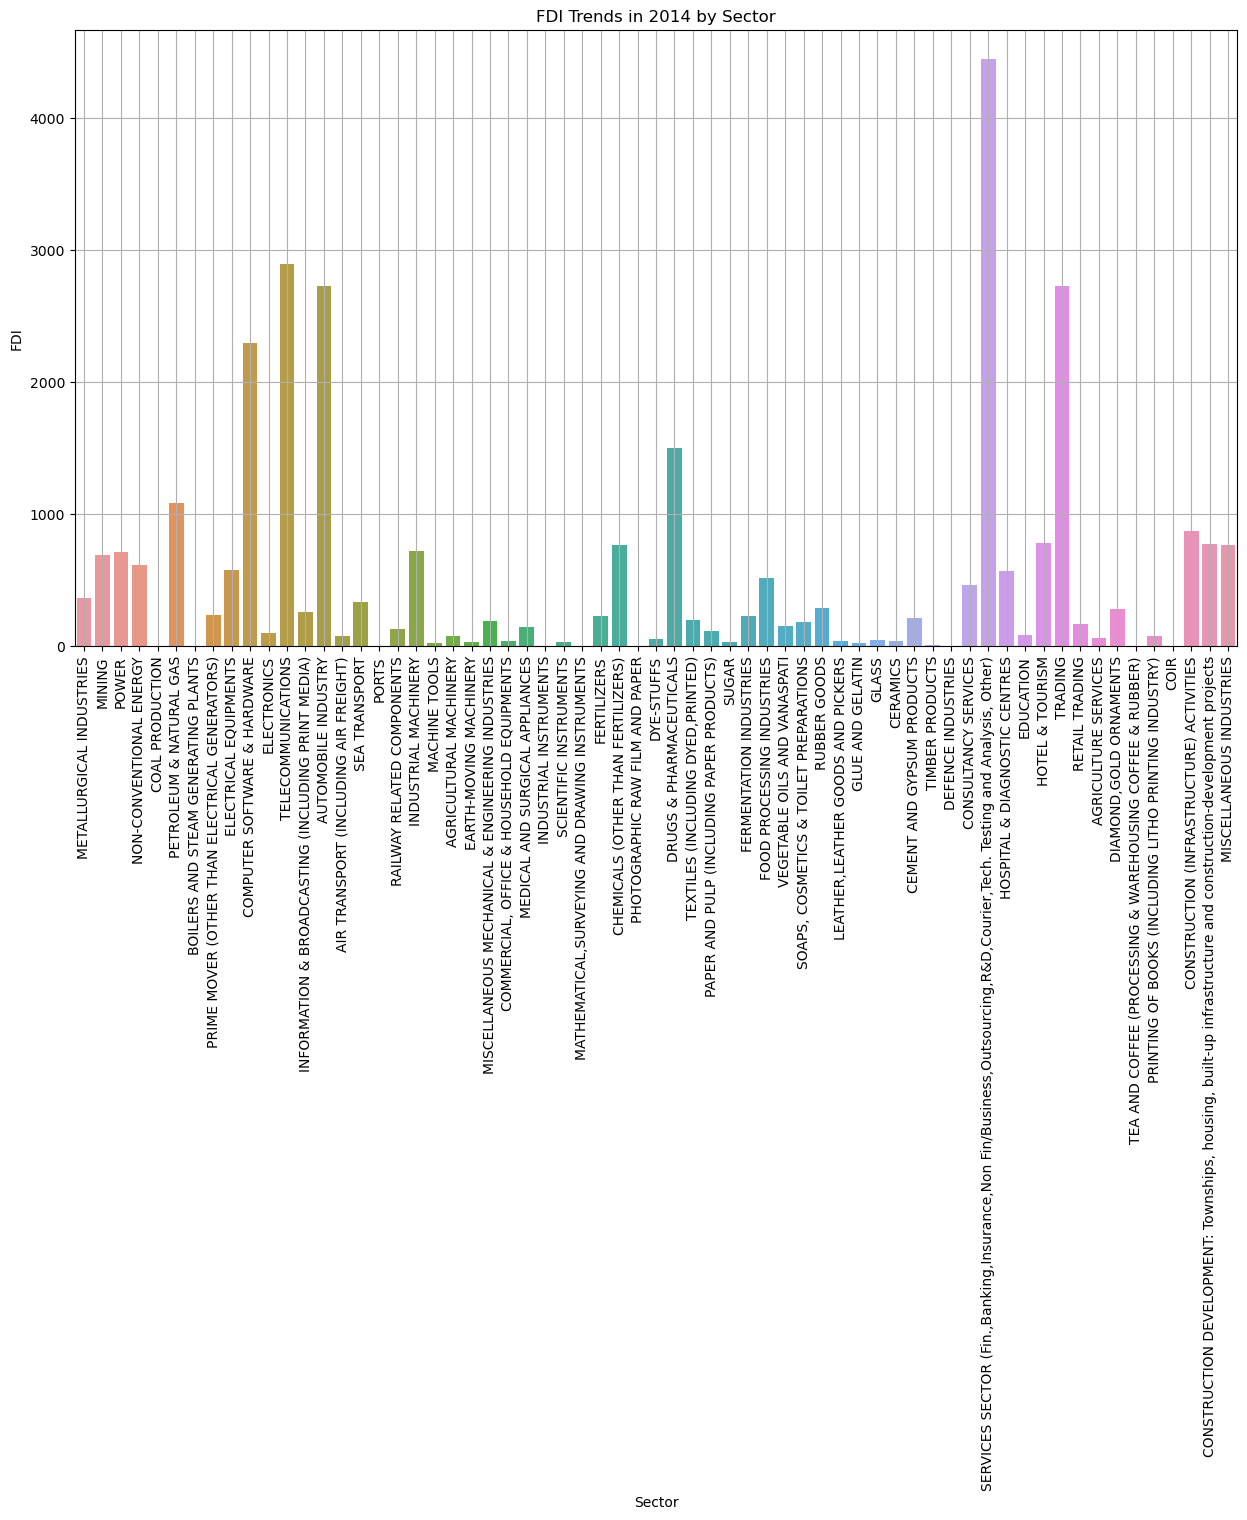

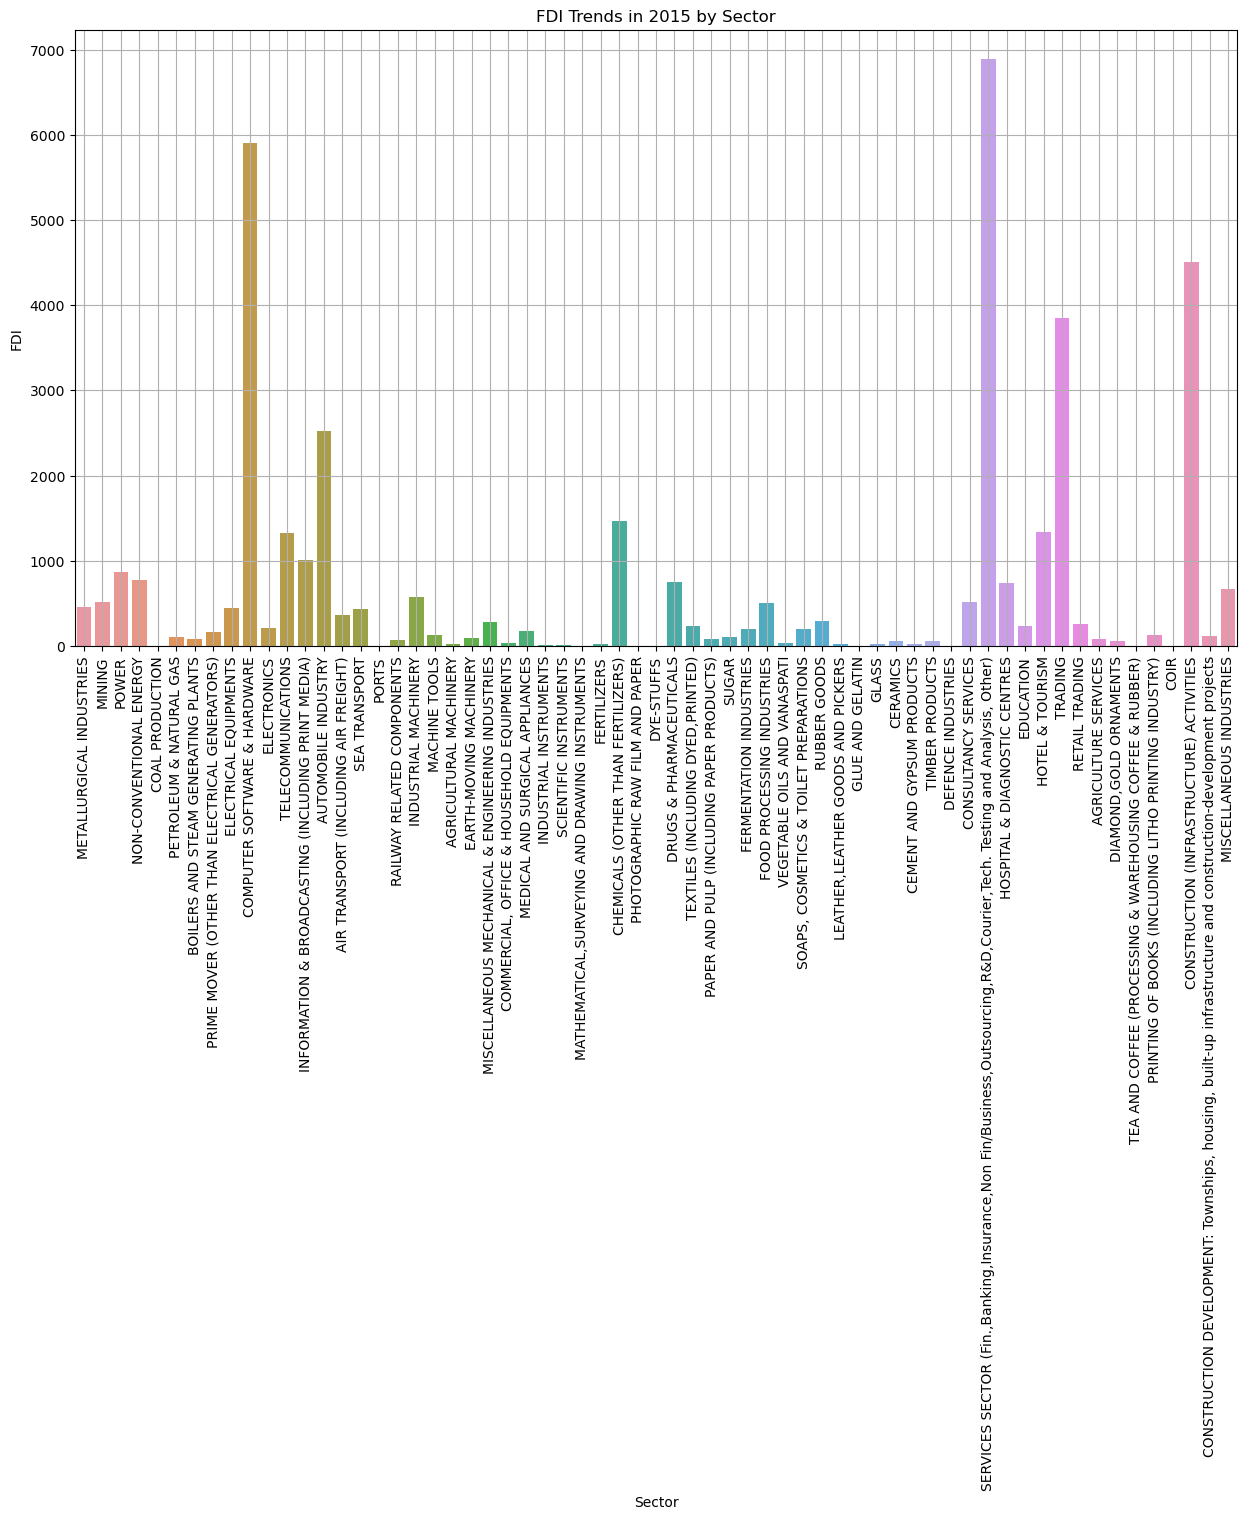

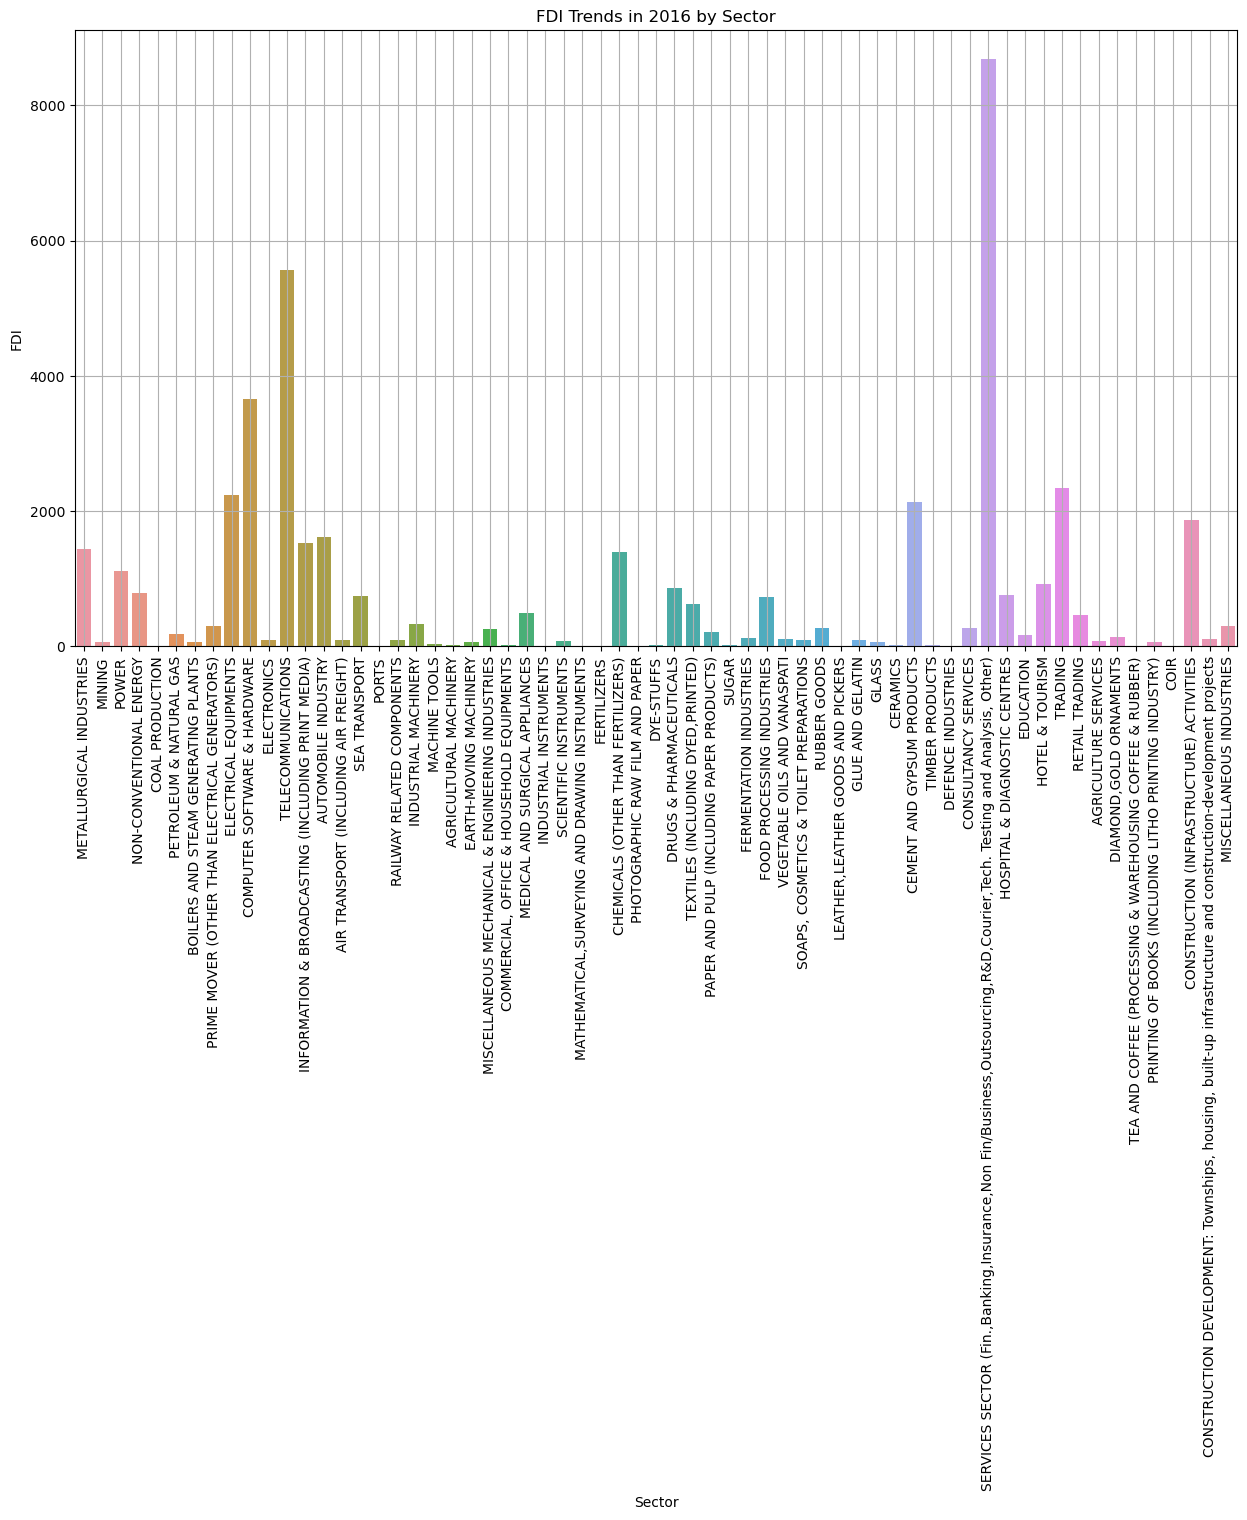

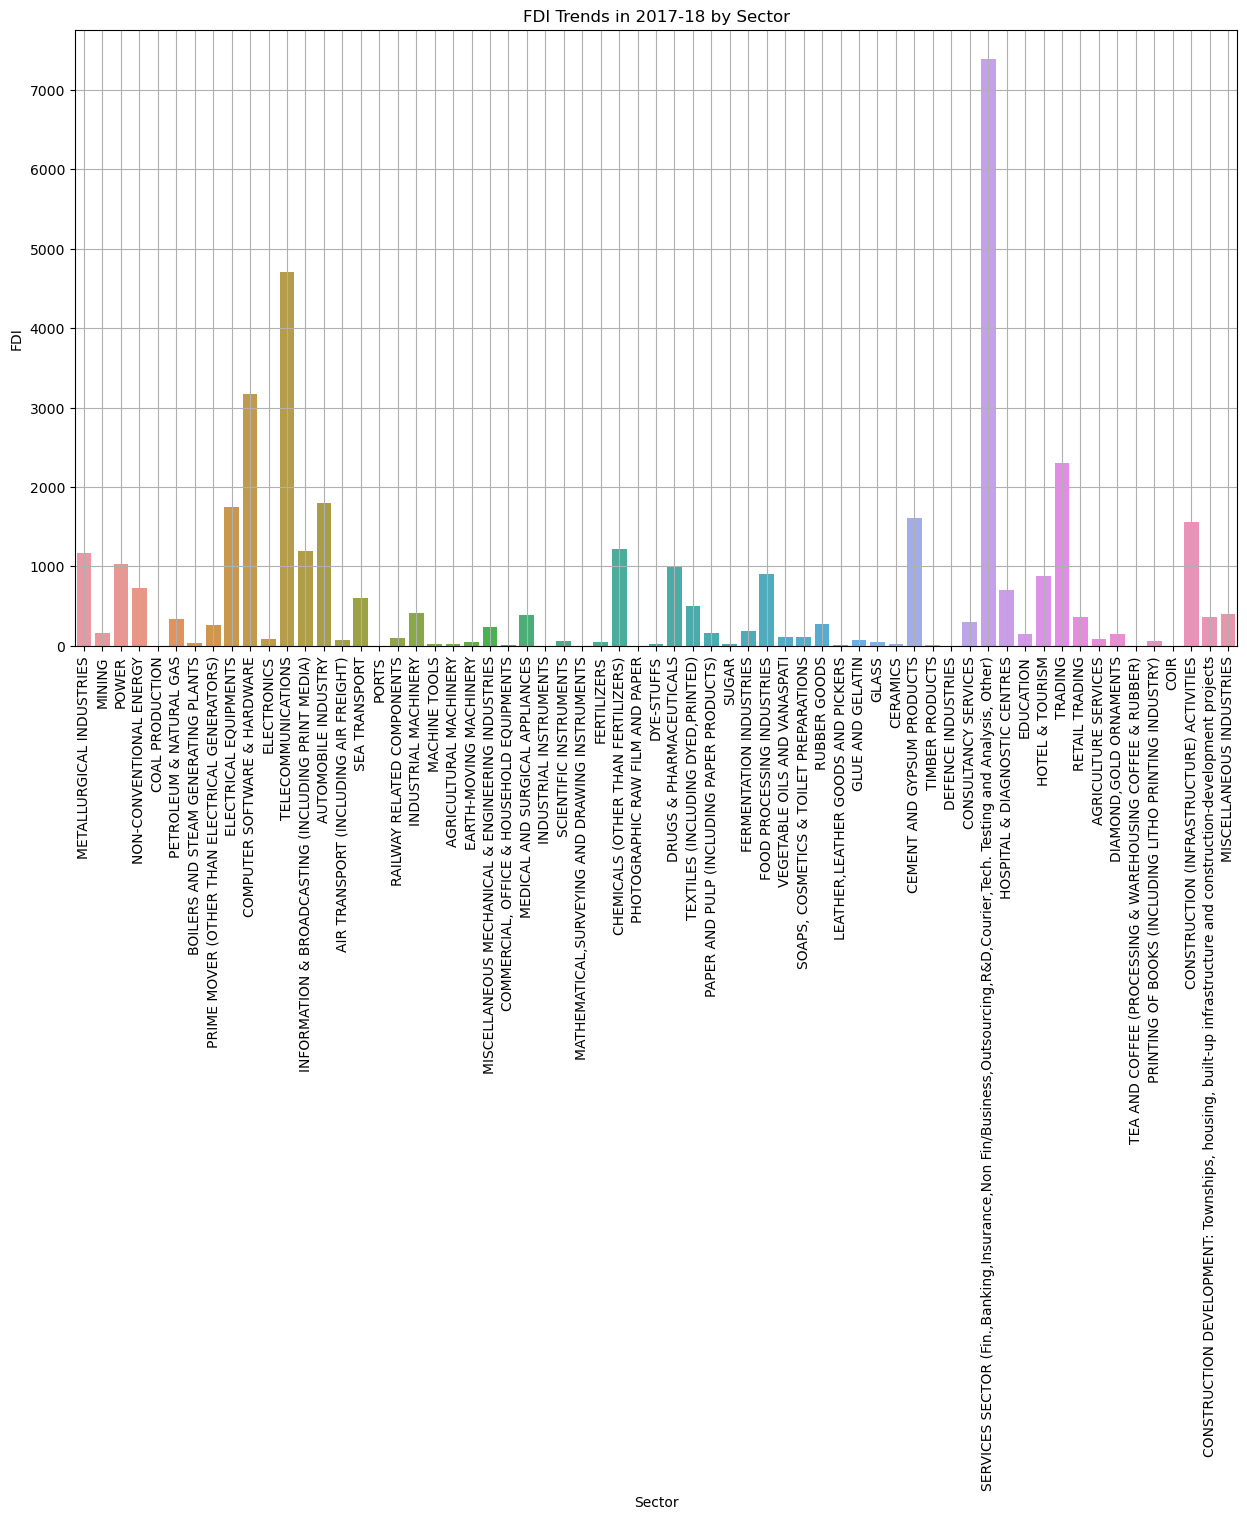

In [63]:
import matplotlib.pyplot as mp
import seaborn as sns

# Merge predictions with the original dataset
investdata = investdata.merge(predictions, on='Sector', how='left')

# Plotting FDI trends for each year individually
for year in years + ['2017-18']:
    mp.figure(figsize=(15, 8))
    sns.barplot(x='Sector', y=year, data=investdata)
    
    # Labeling and aesthetics
    mp.xlabel('Sector')
    mp.ylabel('FDI')
    mp.title(f'FDI Trends in {year} by Sector')
    mp.xticks(rotation=90)
    mp.grid(True)
    mp.show()
